# Прогнозирование растворимости веществ в сверхкритических флюидах

В настоящее время растворимость веществ в сверхкритических растворителях определяется преимущественно экспериментально, а существующие математические модели лишь описывают имеющиеся данные и плохо прогнозируют свойства за их пределами. Эксперименты затруднены из-за характеристик веществ и высокой стоимости. Математические модели требуют подгонки под конкретные данные и не обладают универсальностью.

Современные информационные технологии, особенно машинное обучение, позволяют обучать модели на существующих данных для точного прогнозирования свойств, снижая необходимость в экспериментах и уменьшая затраты. В сфере сверхкритических флюидов машинное обучение может оптимизировать процессы и предсказывать свойства, однако применение машинного обучения пока находится на ранней стадии. Большинство исследований фокусируются на описании растворимости при заданных условиях с ограниченным набором параметров. Более перспективным является использование физических свойств растворенных веществ для создания обобщающих моделей, применимых к широкому спектру веществ. Настоящий проект нацелен на разработку таких универсальных моделей.

***

**Цель работы.**

Разработать универсальную модель на основе нейронных сетей для прогнозирования растворимости различных веществ в сверхкритических растворителях, используя физические свойства растворенных веществ в качестве входных данных.

***

**Задачи исследования.**

- Выбор модели машинного обучения. Выбрать модель машинного обучения, способную использовать физические свойства растворенных веществ для обобщенного прогнозирования растворимости в различных сверхкритических растворителях.
- Обучение и валидация модели. Обучить модель машинного обучения на собранных данных, подобрать оптимальные гиперпараметры, провести валидацию и оценку точности прогнозов.
- Оценка обобщающей способности. Проверить способность модели прогнозировать растворимость для широкого спектра веществ и растворителей, выходящих за пределы обучающего набора данных.

***

**План работы.**

- Изучить общую информацию о данных.
- Предобработать данные (при необходимости).
- Провести исследовательский и корреляционный анализ данных.
- Найти наиболее оптимальную модель.
- Найти гиперпараметры для оптимальной модели.
- Модифицировать данные для лучшего предсказания (при необходимости).
- Оценить качество полученной модели.
- Предоставить итоговый вывод и рекомендации.

***

**Описание данных.**

<table>
    <th>
        <td colspan="4"><b>Параметры системы</b></td>
    </th>
    <tr>
        <td><code>system_temp</code><td>
        <td>Т, К<td>
    </tr>
    <tr>
        <td><code>system_press</code><td>
        <td>Давление, МПа<td>
    </tr>
    <th>
        <td colspan="4"><b>Свойства растворителя</b></td>
    </th>
    <tr>
        <td><code>solvent_temp_crit</code><td>
        <td>Ткр<td>
    </tr>
    <tr>
        <td><code>solvent_press_crit</code><td>
        <td>Ркр<td>
    </tr>
    <tr>
        <td><code>solvent_w</code><td>
        <td>w<td>
    </tr>
    <tr>
        <td><code>solvent_density</code><td>
        <td>Приведенная плотность<td>
    </tr>
    <tr>
        <td><code>solvent_potential</code><td>
        <td>Хим. потенциал<td>
    </tr>
    <tr>
        <td><code>solvent_entropy</code><td>
        <td>Энтропия<td>
    </tr>
    <th>
        <td colspan="4"><b>Свойства растворяемого</b></td>
    </th>
    <tr>
        <td><code>soluble_temp_crit</code><td>
        <td>Ткр<td>
    </tr>
    <tr>
        <td><code>soluble_press_crit</code><td>
        <td>Ркр<td>
    </tr>
    <tr>
        <td><code>soluble_w</code><td>
        <td>w<td>
    </tr>
    <tr>
        <td><code>soluble_v</code><td>
        <td>v<td>
    </tr>
    <tr>
        <td><code>soluble_boil_point</code><td>
        <td>Т кипения<td>
    </tr>
    <tr>
        <td><code>soluble_num_benz_rings</code><td>
        <td>Количество бензольных колец<td>
    </tr>
    <tr>
        <td><code>soluble_molar_mass</code><td>
        <td>Молярная масса, г/моль<td>
    </tr>
    <tr>
        <td><code>soluble_num_carbon_atoms</code><td>
        <td>Количество атомов углерода<td>
    </tr>
    <tr>
        <td><code>soluble_num_hydrogen_atoms</code><td>
        <td>Количество атомов водорода<td>
    </tr>
    <th>
        <td colspan="4"><b>Определяемое (целевой параметр)</b></td>
    </th>
    <tr>
        <td><code>ye_m6</code><td>
        <td>Определяемое<td>
    </tr>
<table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    PolynomialFeatures
)
from sklearn.linear_model import (
    LinearRegression,
    ElasticNet,
    Lasso,
    Ridge
)
from sklearn.neighbors import (
    KNeighborsRegressor
)
from sklearn.tree import (
    DecisionTreeRegressor
)
from sklearn.svm import (
    SVR
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.dummy import (
    DummyClassifier
)

from sklearn.metrics import (
    make_scorer,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from optuna.integration import OptunaSearchCV
from optuna import distributions

from tqdm.notebook import trange, tqdm

## Загрузка и изучение данных.

In [2]:
solubility = pd.read_csv('../datasets/solubility.csv')

In [3]:
solubility

system_temp  system_press  solvent_temp_crit  solvent_press_crit  \
0          308.20          7.98              304.2           7386592.5   
1          308.15          8.31              304.2           7386592.5   
2          308.15          8.75              304.2           7386592.5   
3          308.15          8.31              304.2           7386592.5   
4          308.15          8.75              304.2           7386592.5   
...           ...           ...                ...                 ...   
1102       523.00         25.00              304.2           7386592.5   
1103       523.00         30.00              304.2           7386592.5   
1104       523.00         35.00              304.2           7386592.5   
1105       523.00         40.00              304.2           7386592.5   
1106       523.00         45.00              304.2           7386592.5   

      solvent_w  solvent_density  solvent_potential  solvent_entropy  \
0         0.225         0.875022         -20.173209       159.349151   
1         0.225         1.235802         -20.136631       153.619204   
2         0.225         1.372465         -20.105123       151.689443   
3         0.225         1.235802         -20.136631       153.619204   
4         0.225         1.372465         -20.105123       151.689443   
...         ...              ...                ...              ...   
1102      0.225         0.585497         -50.241231       176.390014   
1103      0.225         0.698187         -49.504761       174.121432   
1104      0.225         0.803735         -48.879921       172.189063   
1105      0.225         0.901076         -48.324248       170.508100   
1106      0.225         0.989992         -47.828104       169.049786   

      soluble_temp_crit  soluble_press_crit  soluble_w  soluble_v  \
0            784.963884        2.935116e+06   0.674284   0.000141   
1            874.810000        2.972000e+06   0.616000   0.000162   
2            874.810000        2.972000e+06   0.616000   0.000162   
3            816.653477        1.672513e+06   0.782516   0.000241   
4            816.653477        1.672513e+06   0.782516   0.000241   
...                 ...                 ...        ...        ...   
1102        1244.000404        3.869924e+07   0.816157   0.004987   
1103        1244.000404        3.869924e+07   0.816157   0.004987   
1104        1244.000404        3.869924e+07   0.816157   0.004987   
1105        1244.000404        3.869924e+07   0.816157   0.004987   
1106        1244.000404        3.869924e+07   0.816157   0.004987   

      soluble_boil_point  soluble_num_benz_rings  soluble_molar_mass  \
0                 568.15                       3            166.2200   
1                 655.65                       3            202.2600   
2                 655.65                       3            202.2600   
3                 632.15                       3            244.3300   
4                 632.15                       3            244.3300   
...                  ...                     ...                 ...   
1102              773.00                       6            276.3307   
1103              773.00                       6            276.3307   
1104              773.00                       6            276.3307   
1105              773.00                       6            276.3307   
1106              773.00                       6            276.3307   

      soluble_num_carbon_atoms  soluble_num_hydrogen_atoms  ye_m6  
0                           13                          10  330.0  
1                           16                          10  232.0  
2                           16                          10  241.0  
3                           19                          16  485.0  
4                           19                          16  568.0  
...                        ...                         ...    ...  
1102                        22                          12   63.3  
1103          

In [4]:
solubility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   system_temp                 1107 non-null   float64
 1   system_press                1107 non-null   float64
 2   solvent_temp_crit           1107 non-null   float64
 3   solvent_press_crit          1107 non-null   float64
 4   solvent_w                   1107 non-null   float64
 5   solvent_density             1107 non-null   float64
 6   solvent_potential           1107 non-null   float64
 7   solvent_entropy             1107 non-null   float64
 8   soluble_temp_crit           1107 non-null   float64
 9   soluble_press_crit          1107 non-null   float64
 10  soluble_w                   1107 non-null   float64
 11  soluble_v                   1107 non-null   float64
 12  soluble_boil_point          1107 non-null   float64
 13  soluble_num_benz_rings      1107 

In [5]:
solubility.describe()

system_temp  system_press  solvent_temp_crit  solvent_press_crit  \
count  1107.000000   1107.000000       1.107000e+03              1107.0   
mean    323.602529     20.304002       3.042000e+02           7386592.5   
std      21.977389      7.879128       5.686911e-14                 0.0   
min     308.150000      7.980000       3.042000e+02           7386592.5   
25%     313.150000     13.640000       3.042000e+02           7386592.5   
50%     323.150000     18.930000       3.042000e+02           7386592.5   
75%     328.150000     26.250000       3.042000e+02           7386592.5   
max     523.000000     48.340000       3.042000e+02           7386592.5   

          solvent_w  solvent_density  solvent_potential  solvent_entropy  \
count  1.107000e+03      1107.000000        1107.000000      1107.000000   
mean   2.250000e-01         1.578062         -21.730475       150.468301   
std    2.776812e-17         0.315491           3.196064         6.084973   
min    2.250000e-01         0.227604         -53.957986       139.754711   
25%    2.250000e-01         1.429270         -22.531460       146.290728   
50%    2.250000e-01         1.658122         -21.306900       149.127780   
75%    2.250000e-01         1.810510         -20.062650       152.790045   
max    2.250000e-01         2.109915         -18.342585       186.707866   

       soluble_temp_crit  soluble_press_crit    soluble_w    soluble_v  \
count        1107.000000        1.107000e+03  1107.000000  1107.000000   
mean          870.706389        3.670961e+06     0.568204     0.000280   
std            97.672628        5.570248e+06     0.138191     0.000745   
min           728.279844        1.672513e+06     0.304000     0.000111   
25%           810.870000        2.670000e+06     0.479000     0.000141   
50%           869.000000        2.870000e+06     0.509000     0.000159   
75%           936.000000        2.972000e+06     0.674284     0.000162   
max          1244.000404        3.869924e+07     0.821000     0.004987   

       soluble_boil_point  soluble_num_benz_rings  soluble_molar_mass  \
count         1107.000000             1107.000000         1107.000000   
mean           644.961156                3.190605          195.545112   
std            111.426529                0.797137           36.829098   
min            491.050000                2.000000          128.170000   
25%            568.150000                3.000000          166.220000   
50%            632.150000                3.000000          202.250000   
75%            675.150000                4.000000          228.290000   
max            984.150000                6.000000          276.330700   

       soluble_num_carbon_atoms  soluble_num_hydrogen_atoms         ye_m6  
count               1107.000000                 1107.000000   1107.000000  
mean                  15.356820                   11.009937   2615.284137  
std                    2.919668                    2.195444   5231.205990  
min                   10.000000                    8.000000      0.150000  
25%                   13.000000                   10.000000     87.000000  
50%                   16.000000                   10.000000    526.000000  
75%                   18.000000                   12.000000   2230.000000  
max                   22.000000                   16.000000  46100.000000

Т.к. в дальнейшем планируется использовать модели машинного обучения, то оставить необходимо только те признаки, которые имеют какую-то ценность, в данном случае признаки `solvent_temp_crit`, `solvent_press_crit`, `solvent_w` являются константами, соответственно их необходимо удалить.

In [6]:
solubility.drop(columns=['solvent_temp_crit', 'solvent_press_crit', 'solvent_w'], inplace=True)

Удалим дубликаты в данных, если они есть.

In [7]:
solubility[solubility.duplicated(keep=False)]

system_temp  system_press  solvent_density  solvent_potential  \
56       308.15         10.23         1.542509         -20.010403   
57       308.15         10.23         1.542509         -20.010403   

    solvent_entropy  soluble_temp_crit  soluble_press_crit  soluble_w  \
56       149.250968              748.4           4050000.0      0.304   
57       149.250968              748.4           4050000.0      0.304   

    soluble_v  soluble_boil_point  soluble_num_benz_rings  soluble_molar_mass  \
56   0.000111              491.05                       2              128.17   
57   0.000111              491.05                       2              128.17   

    soluble_num_carbon_atoms  soluble_num_hydrogen_atoms    ye_m6  
56                        10                           8  12100.0  
57                        10                           8  12100.0

In [8]:
solubility.drop_duplicates(inplace=True)

In [9]:
solubility.isna().sum()

system_temp                   0
system_press                  0
solvent_density               0
solvent_potential             0
solvent_entropy               0
soluble_temp_crit             0
soluble_press_crit            0
soluble_w                     0
soluble_v                     0
soluble_boil_point            0
soluble_num_benz_rings        0
soluble_molar_mass            0
soluble_num_carbon_atoms      0
soluble_num_hydrogen_atoms    0
ye_m6                         0
dtype: int64

**Вывод по загрузке и первоначальному изучению данных.**

- Данные загружены, пропусков нет и дублируется одна строка.
- Всего в данных 1107 объектов (строк).
- 17 входных признаков и 1 целевой.
- 3 входных признака были удалены, т.к. являются константами, дубликаты также удалены.

## Исследовательский анализ данных.

In [10]:
for column in solubility.columns:
    print(f'Количество уникальных значений для колонки {column}:', solubility[column].nunique())

Количество уникальных значений для колонки system_temp: 19
Количество уникальных значений для колонки system_press: 556
Количество уникальных значений для колонки solvent_density: 877
Количество уникальных значений для колонки solvent_potential: 878
Количество уникальных значений для колонки solvent_entropy: 878
Количество уникальных значений для колонки soluble_temp_crit: 13
Количество уникальных значений для колонки soluble_press_crit: 12
Количество уникальных значений для колонки soluble_w: 12
Количество уникальных значений для колонки soluble_v: 12
Количество уникальных значений для колонки soluble_boil_point: 12
Количество уникальных значений для колонки soluble_num_benz_rings: 5
Количество уникальных значений для колонки soluble_molar_mass: 10
Количество уникальных значений для колонки soluble_num_carbon_atoms: 9
Количество уникальных значений для колонки soluble_num_hydrogen_atoms: 4
Количество уникальных значений для колонки ye_m6: 868


Не смотря на то, что все значения в исходных данных - количественные, большинство признаков скорее относятся к дискретным количественным, т.к. их диапазон возможных значений менее 15.

Целевой признак $Y*10^{-6}$ является количественным, соответственно перед нами задача регрессии.

In [11]:
def draw_numeric_plots(df, column, title):
    plt.figure(figsize=(16, 6), dpi=300)
    
    ax0 = plt.subplot(121)
    ax0 = sns.histplot(data=df, x=column, kde=True)
    ax0.set_title(f'Распределение "{title}"')
    ax0.set_ylabel('Количество')
    ax0.set_xlabel(title)
    
    ax1 = plt.subplot(122)
    ax1 = sns.boxplot(data=df, x=column)
    ax1 = sns.swarmplot(data=df, x=column, color='orange', size=2)
    ax1.set_title(f'Диаграмма размаха "{title}"')
    ax1.set_xlabel(title)
    
    plt.show()

In [12]:
def draw_categorical_plots(df, column, title):
    plt.figure(figsize=(16, 6))

    ax0 = plt.subplot(121)
    ax0 = sns.countplot(data=df, x=column)
    ax0.set_title(f'Распределение "{title}"')
    ax0.set_ylabel('Количество')
    ax0.set_xlabel(title)
    if df[column].nunique() > 10:
        ax0.tick_params(axis='x', rotation=45)
    
    ax1 = plt.subplot(122)
    ax1.pie(df[column].value_counts(), labels=df[column].value_counts().index,
                  autopct='%1.2f%%',
                  explode=[0.04] * len(df[column].value_counts()),
                  shadow=True)
    ax1.set_title(f'Соотношение "{title}"')
    ax1.set_xlabel(title)

    plt.tight_layout()
    plt.show()

In [13]:
cat_cols = {
    'soluble_temp_crit': 'Ткр (растворяемого)',
    'soluble_press_crit': 'Ркр (растворяемого)',
    'soluble_w': 'w (растворяемого)',
    'soluble_v': 'v (растворяемого)',
    'soluble_boil_point': 'Т кипения (растворяемого)',
    'soluble_num_benz_rings': 'Количество бензольных колец (растворяемого)',
    'soluble_molar_mass': 'Молярная масса (растворяемого)',
    'soluble_num_carbon_atoms': 'Количество атомов углерода (растворяемого)',
    'soluble_num_hydrogen_atoms': 'Количество атомов водорода (растворяемого)'
}

num_cols = {
    'system_temp': 'Т (системы)',
    'system_press': 'Давление (системы)',
    'solvent_density': 'Приведенная плотность (растворителя)',
    'solvent_potential': 'Хим. потенциал (растворителя)',
    'solvent_entropy': 'Энтропия (растворителя)',
    'ye_m6': 'Определяемое'
}

C:\Users\Aleksandr\anaconda3\envs\practicum\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


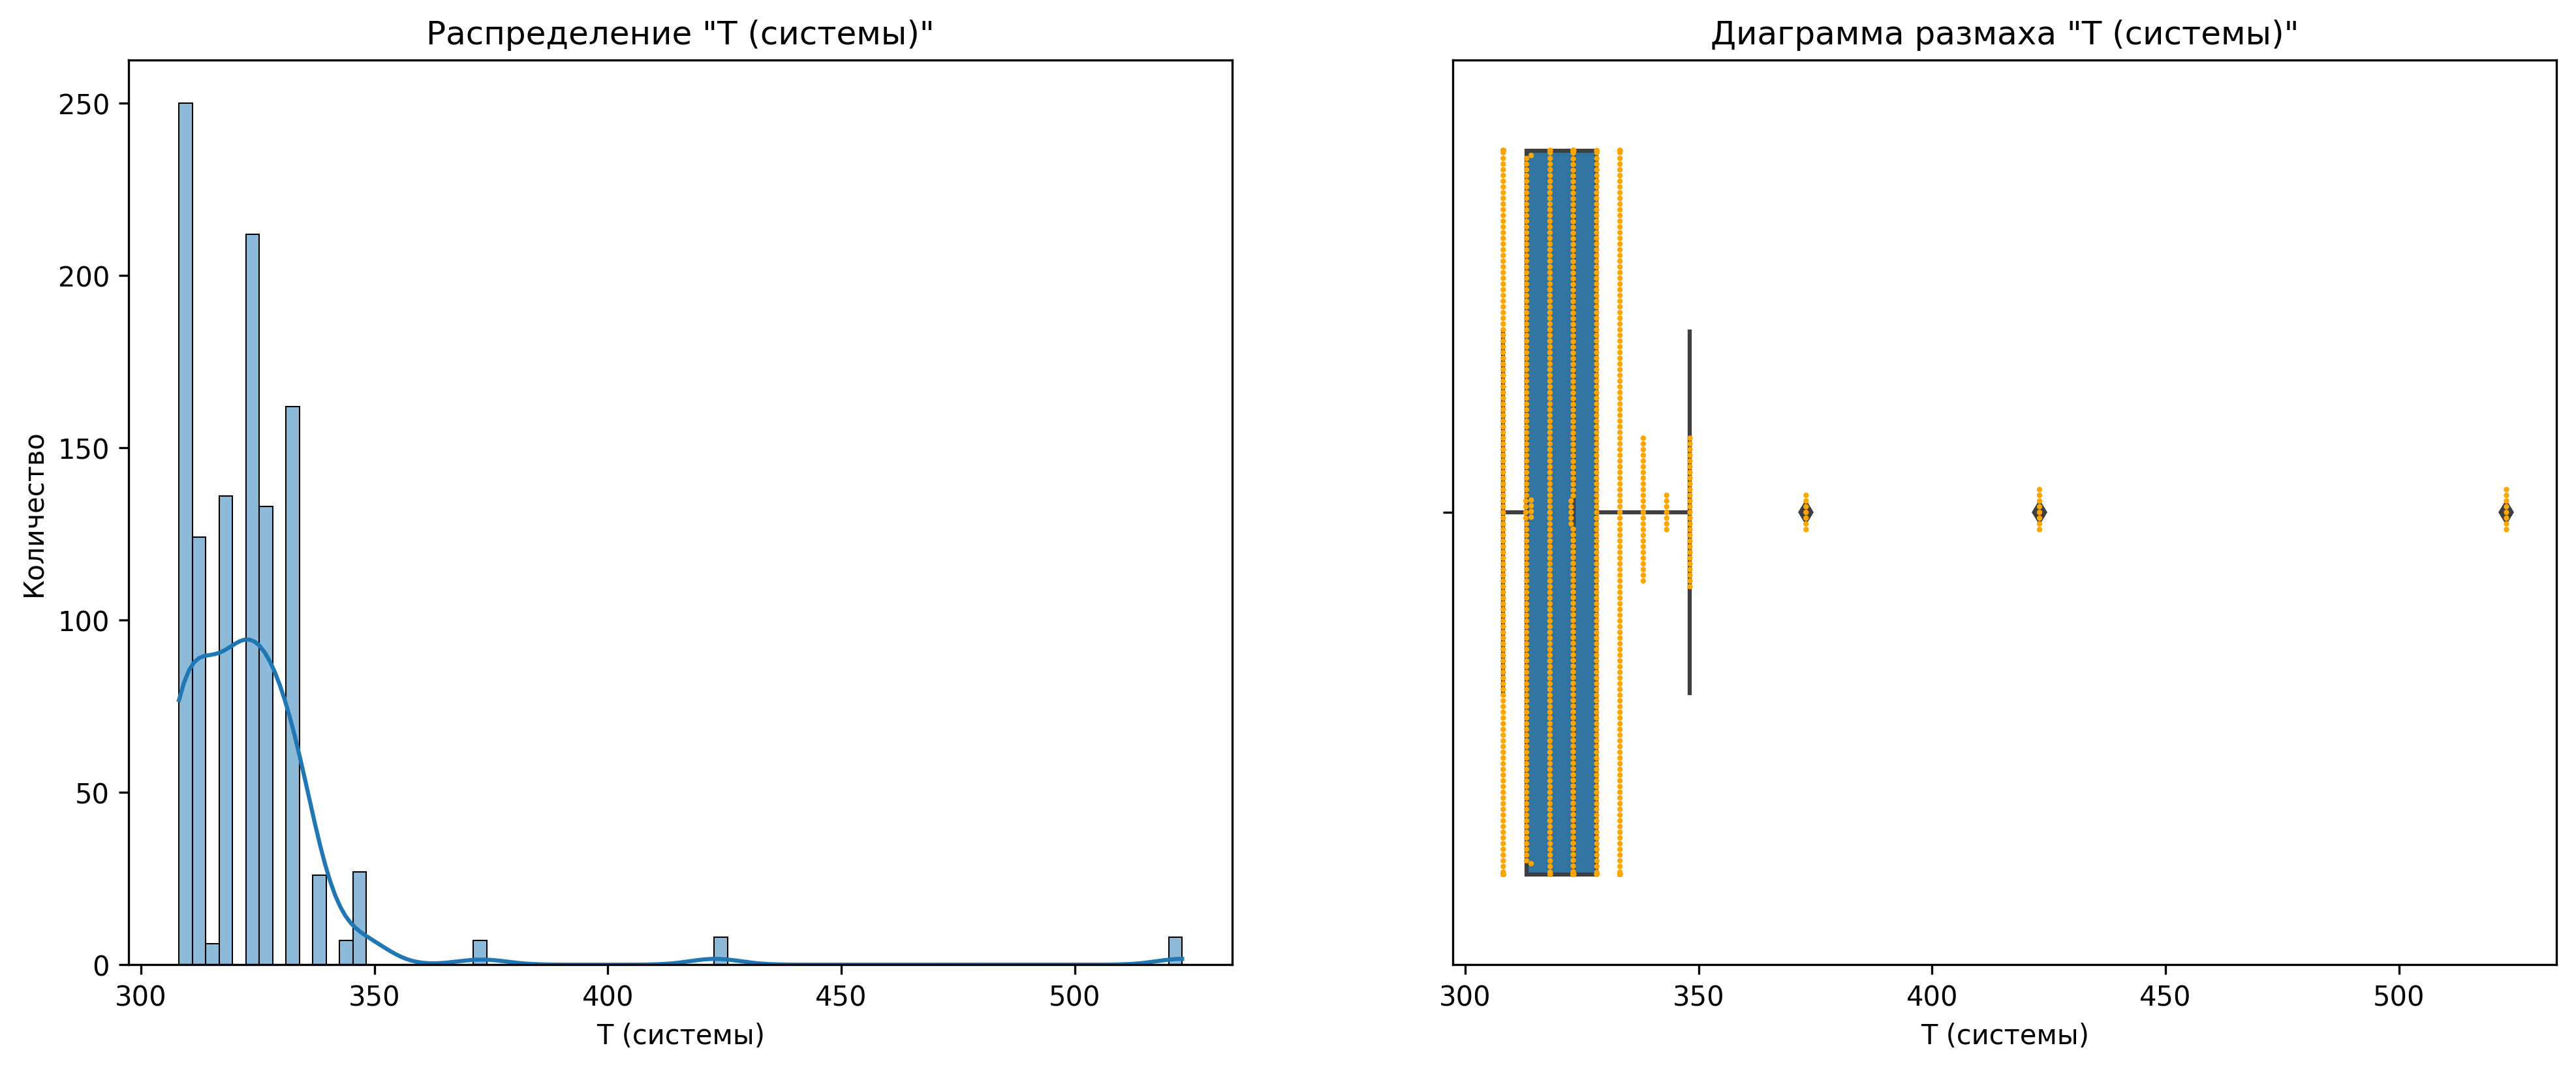

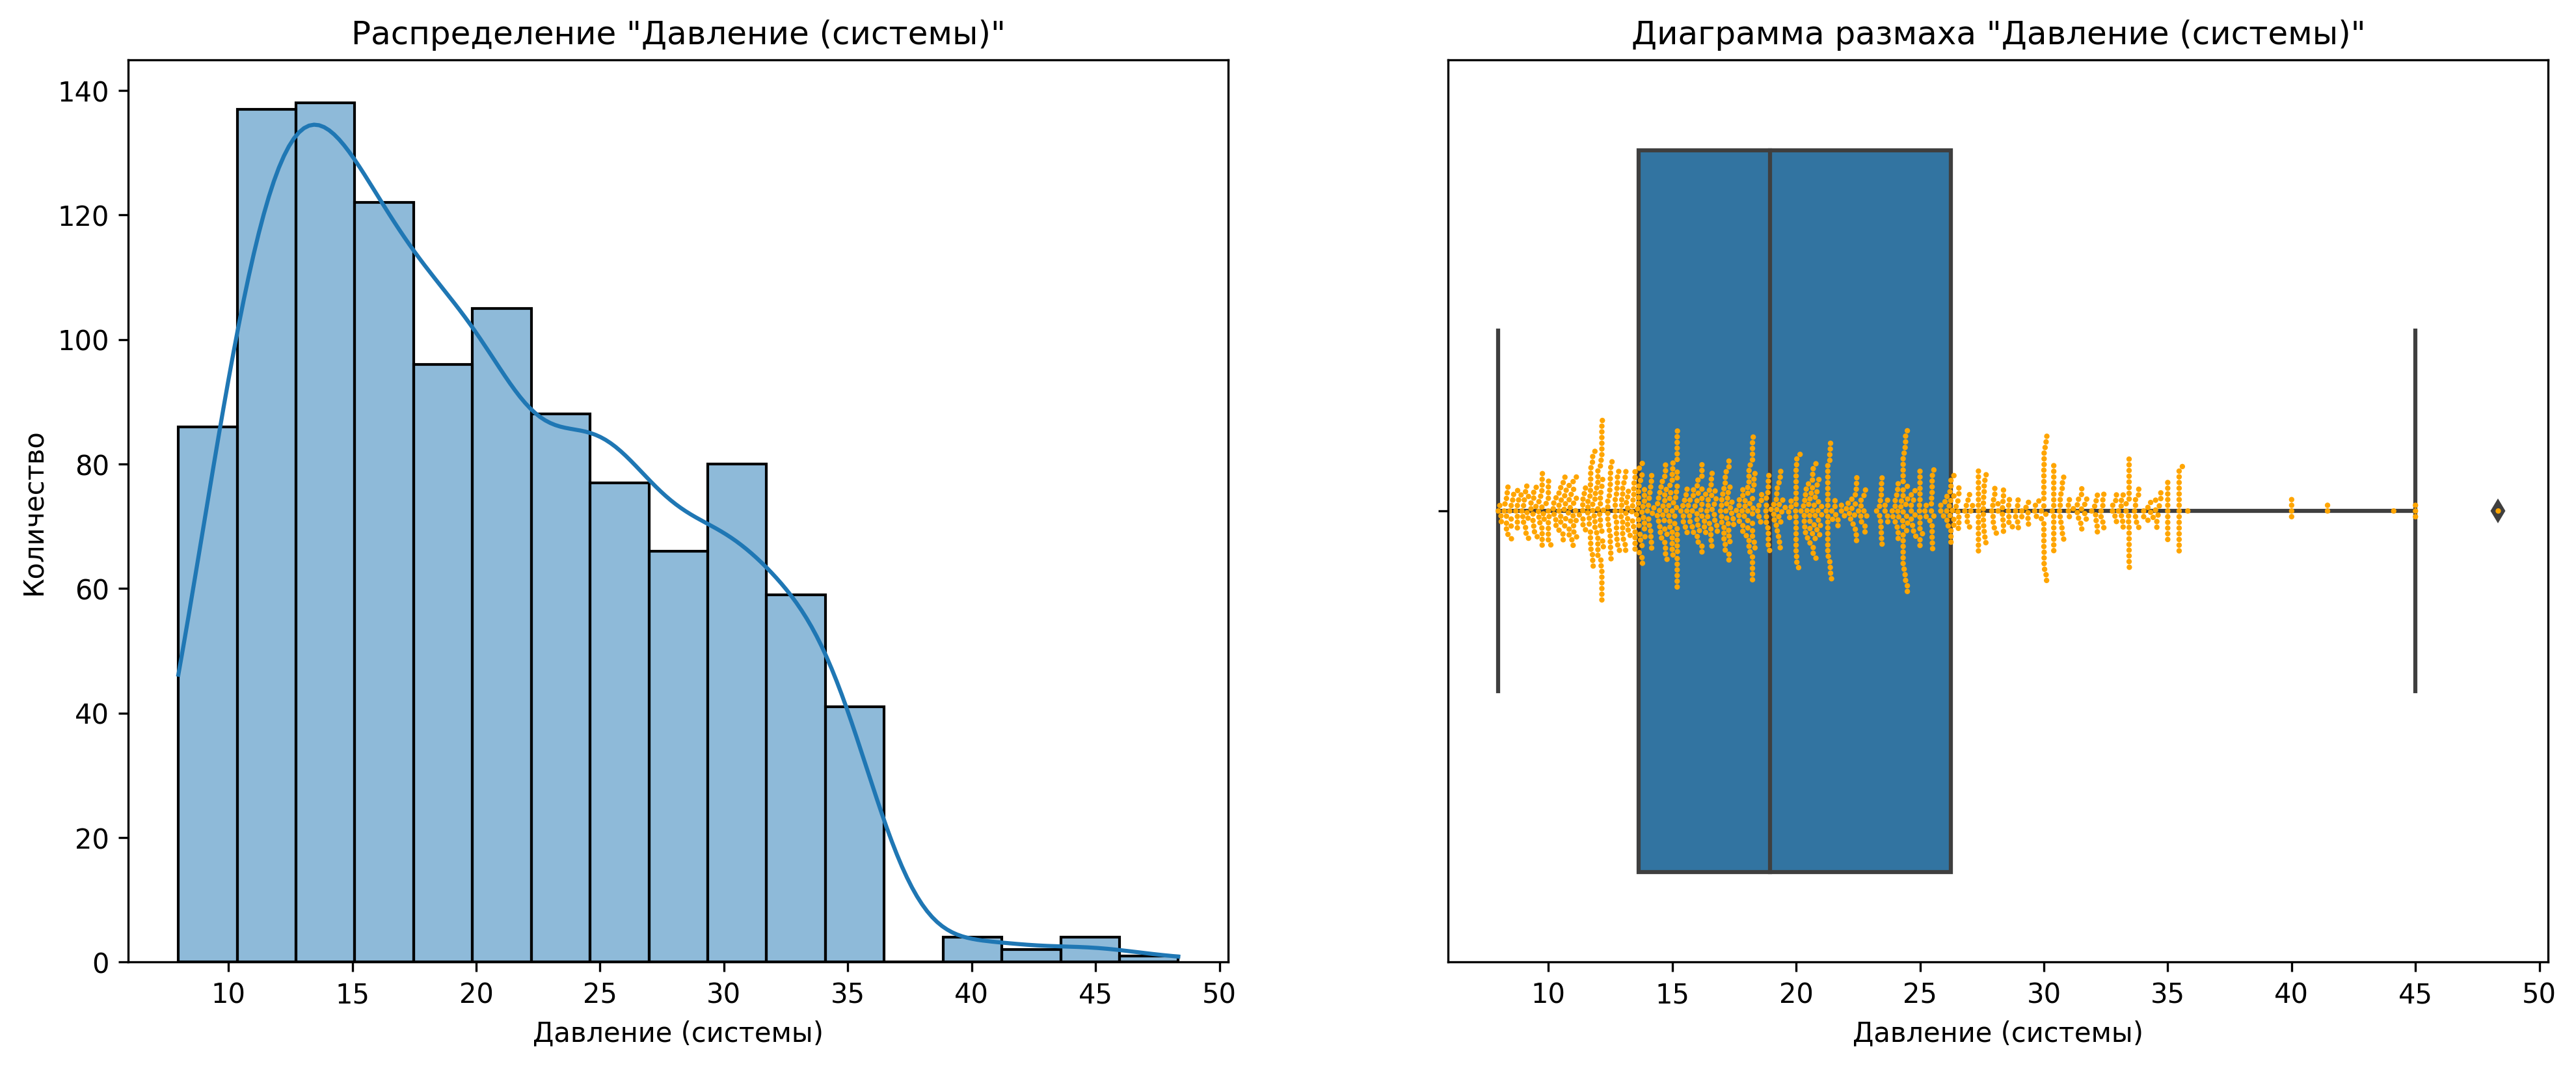

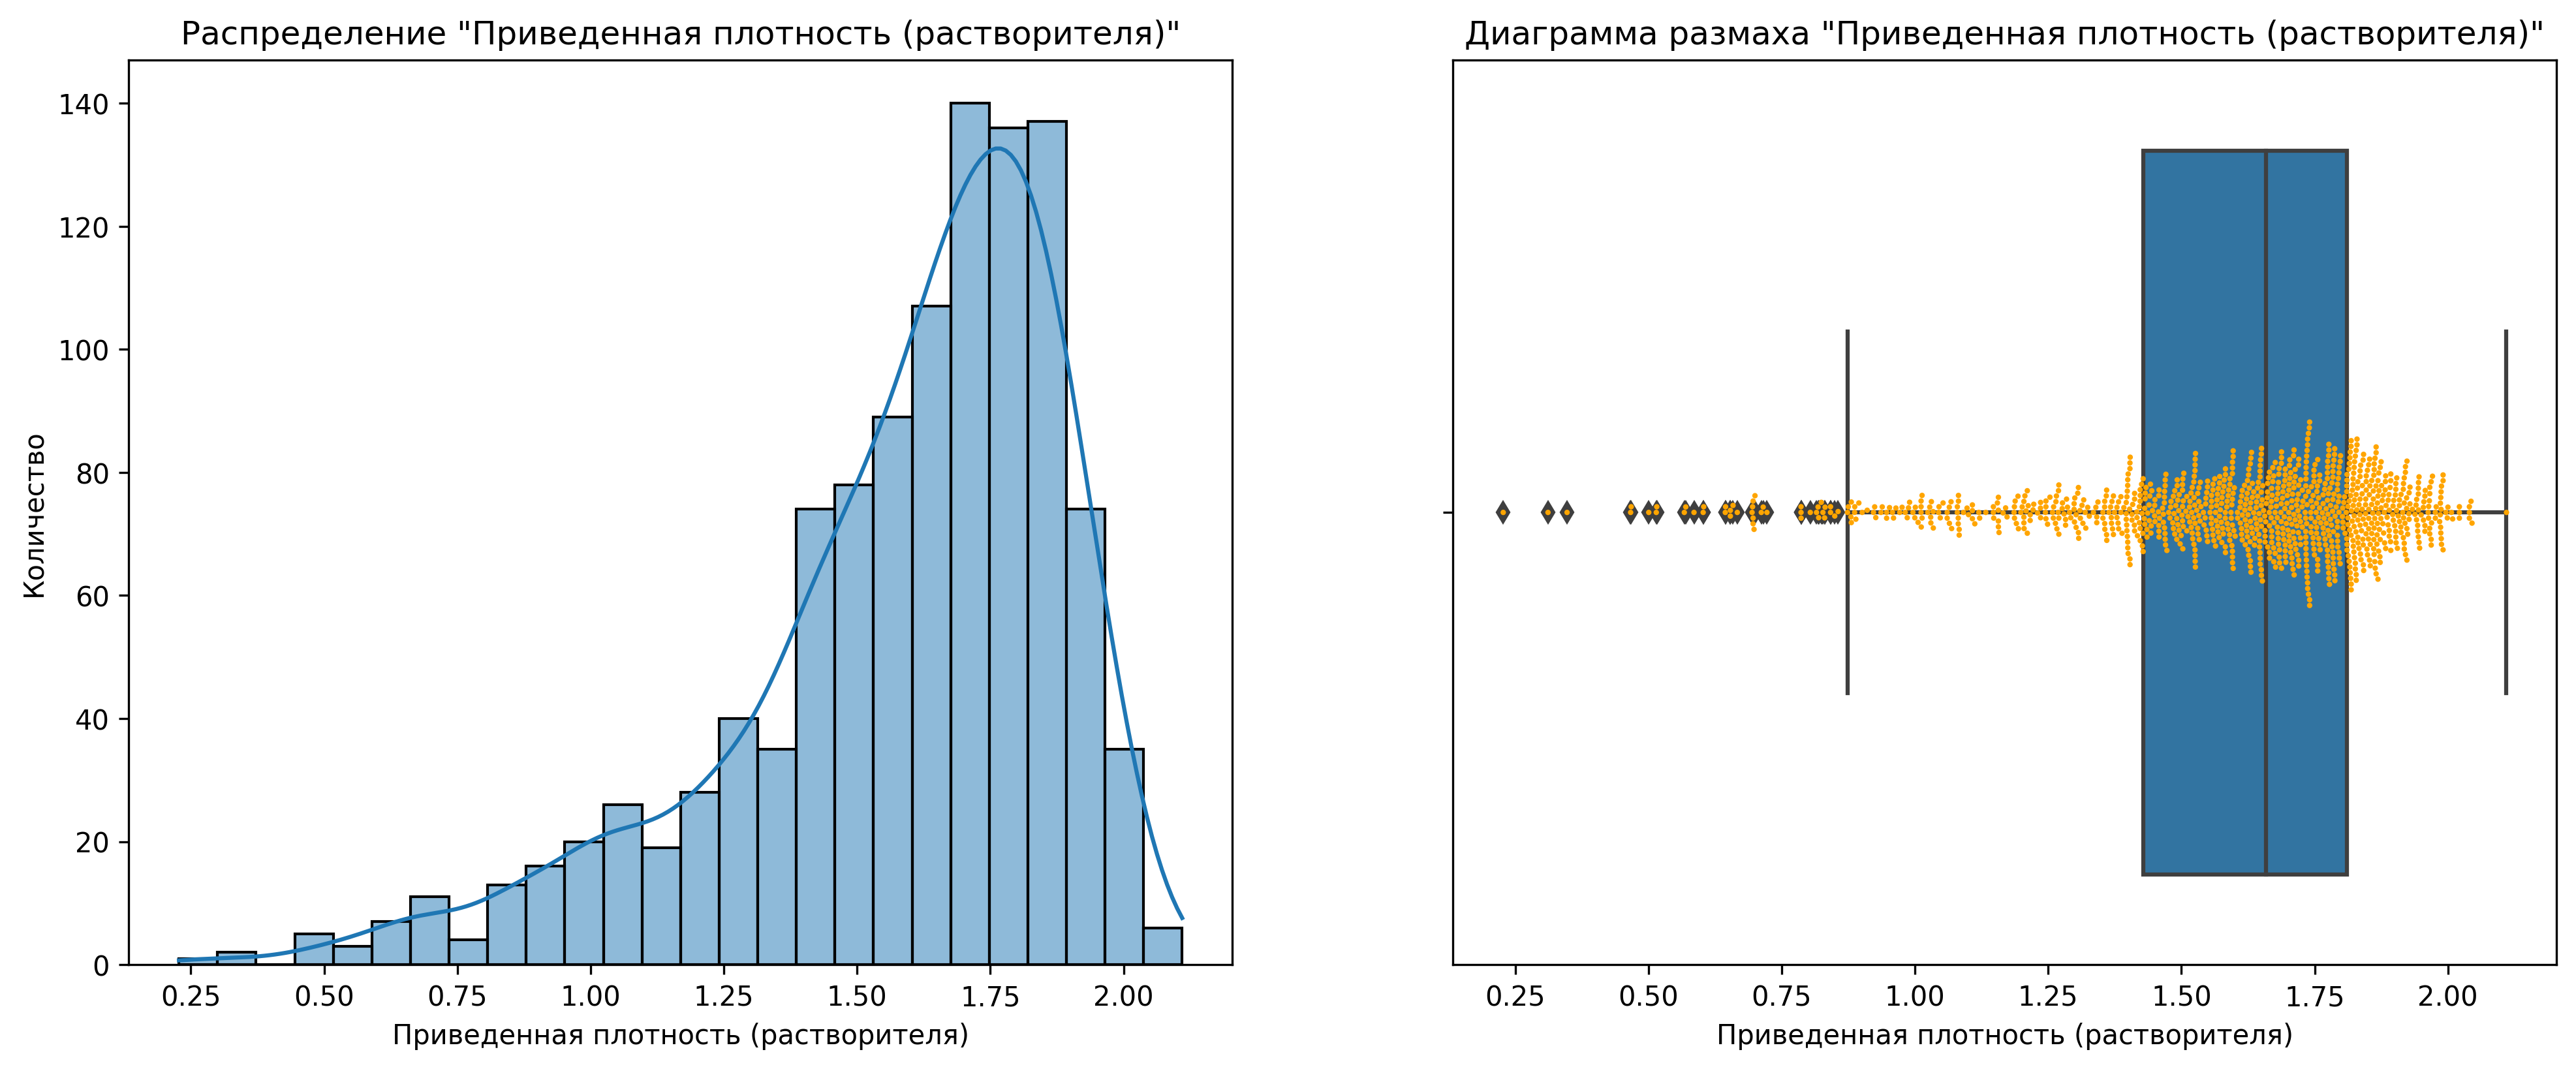

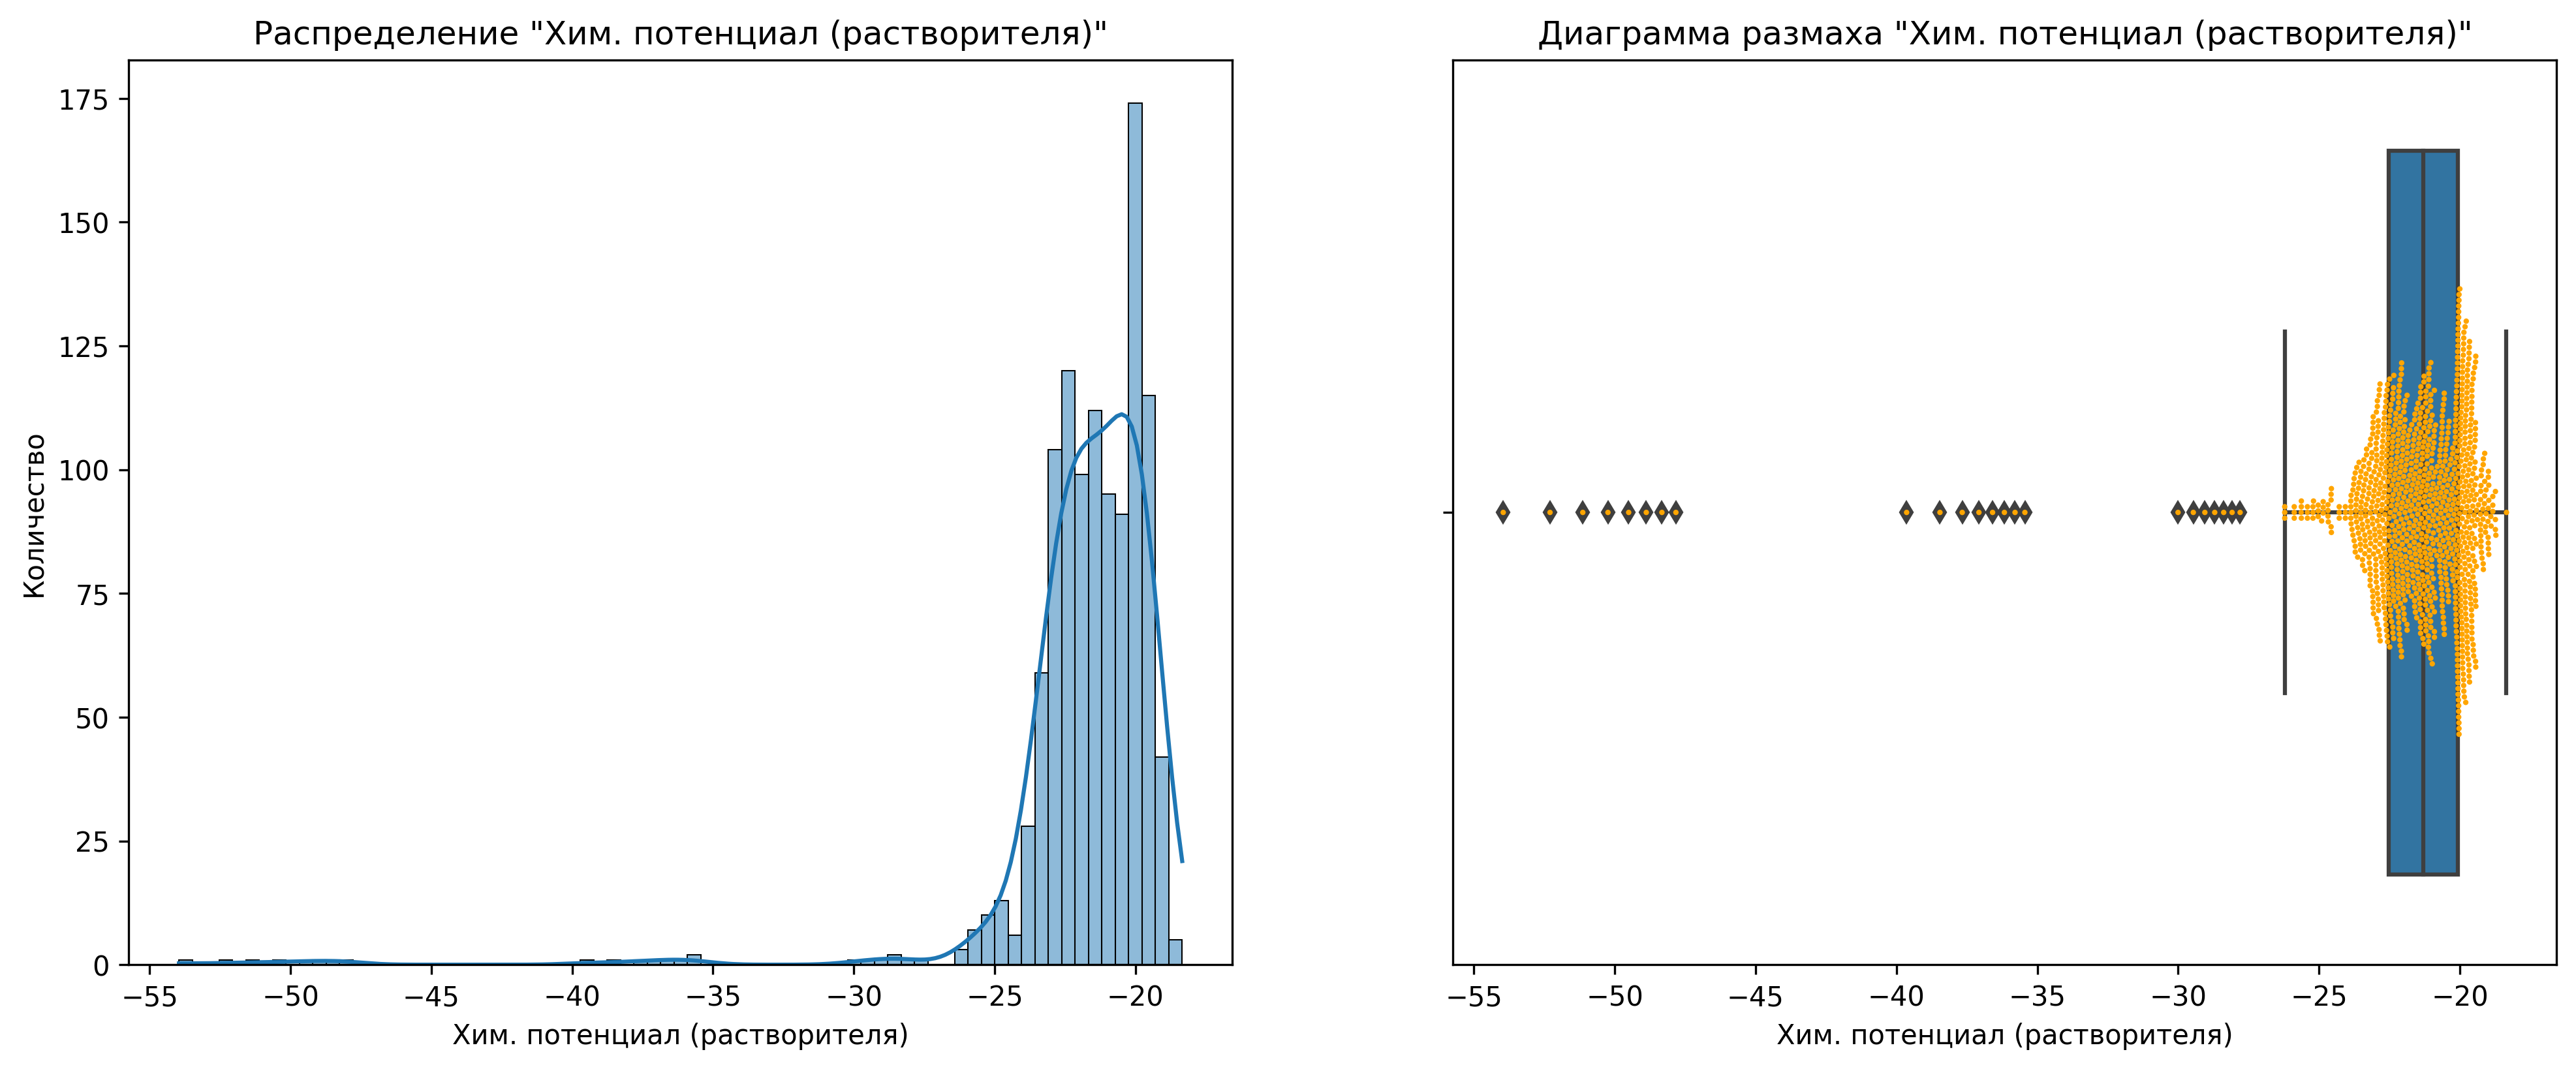

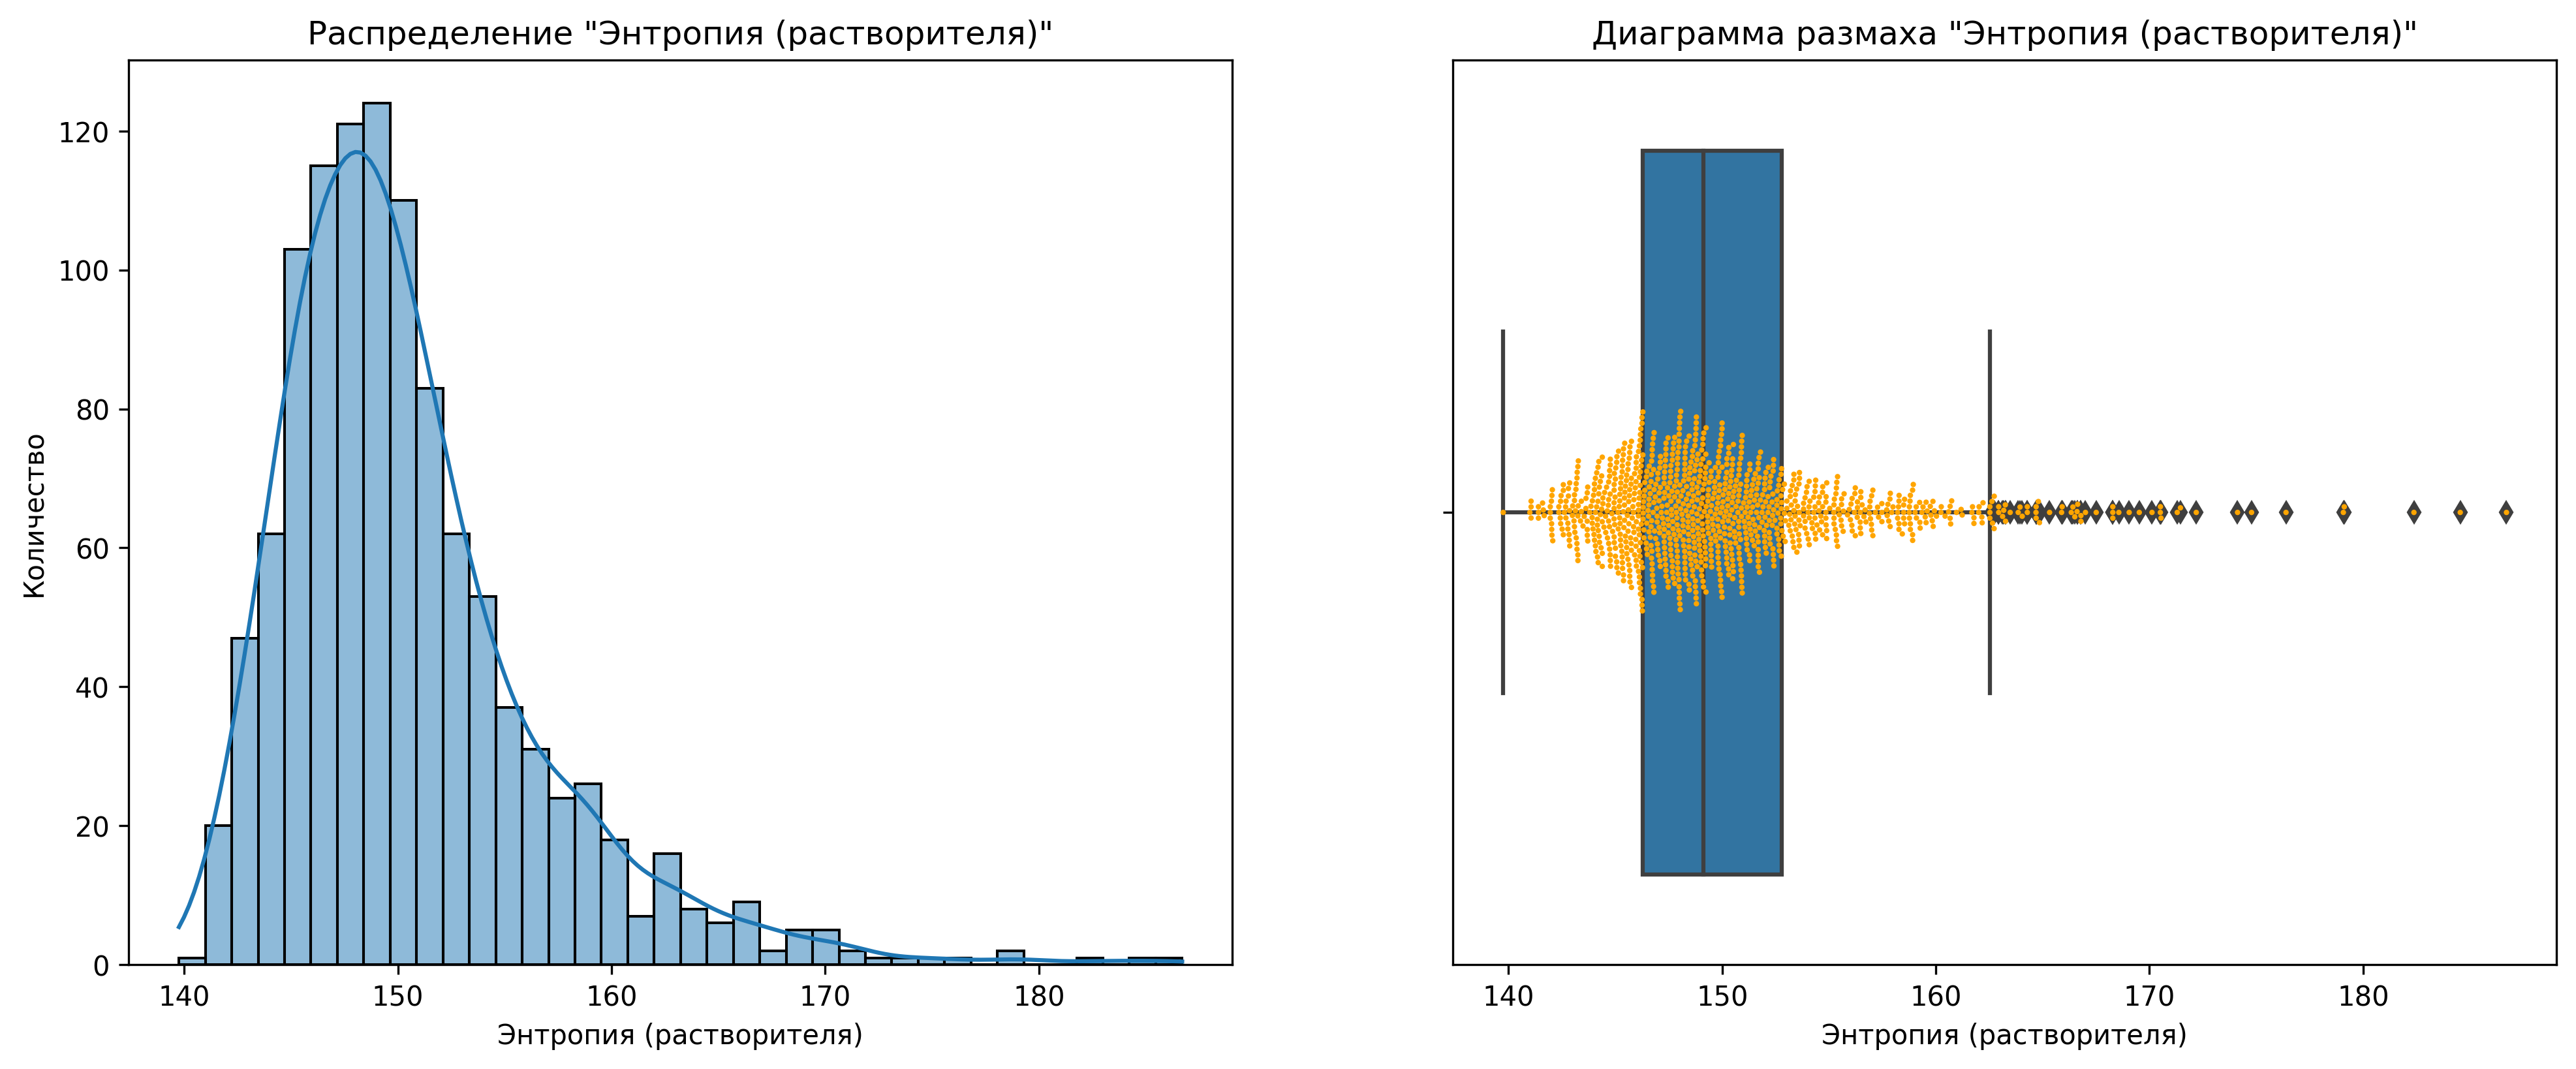

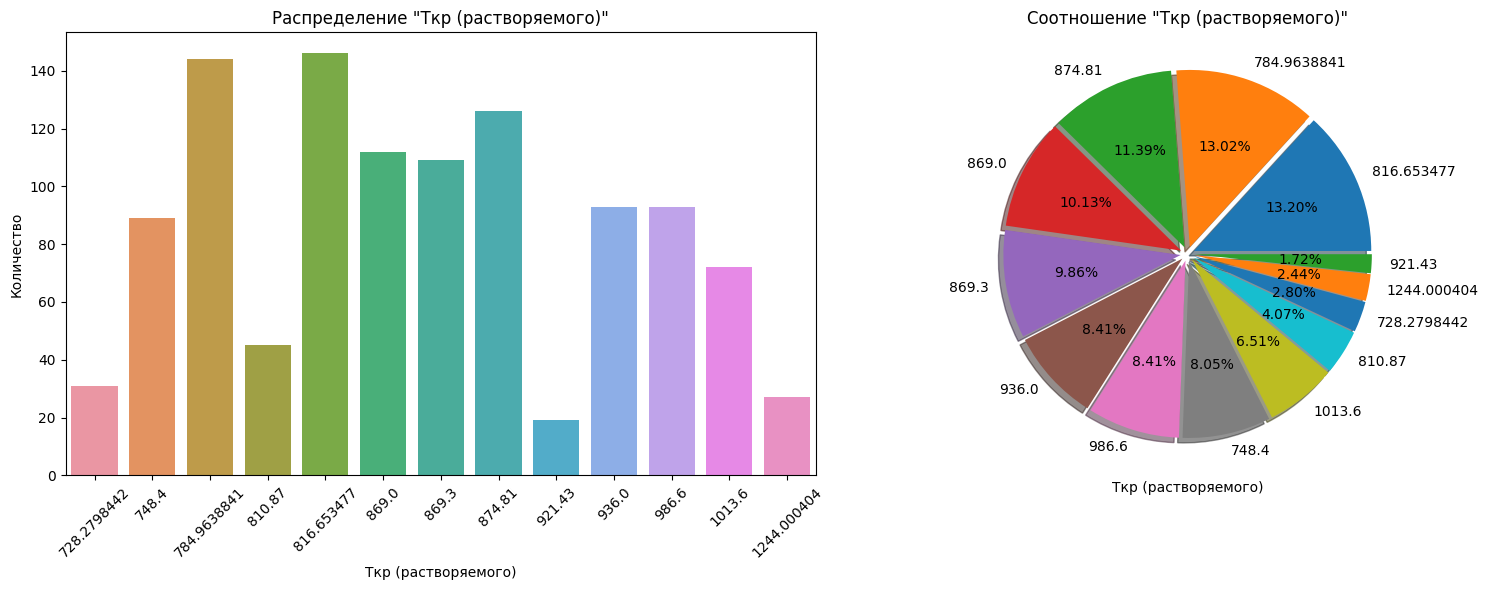

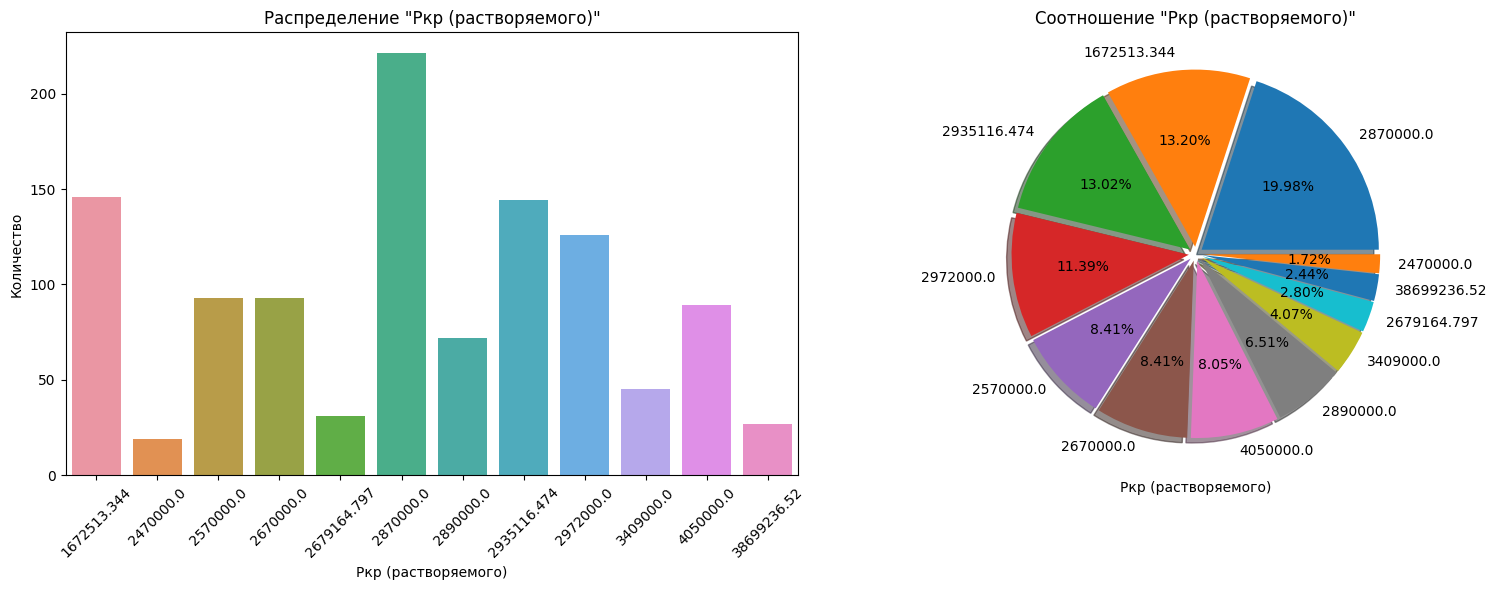

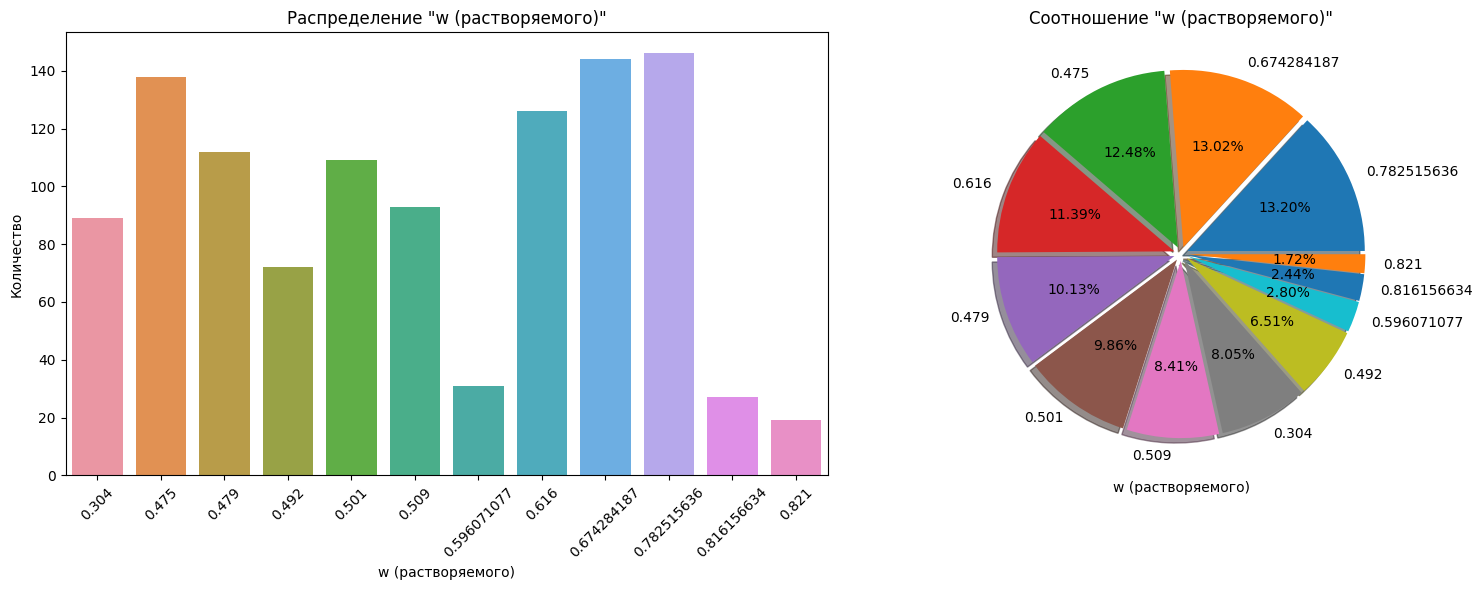

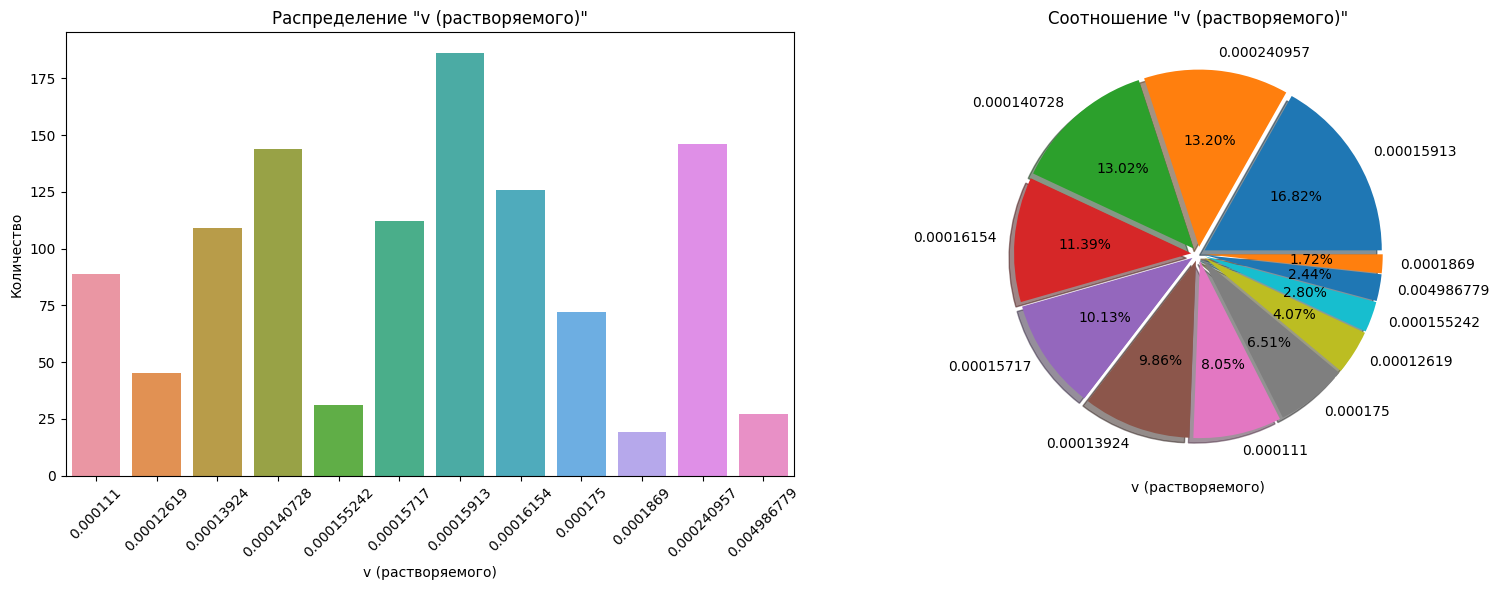

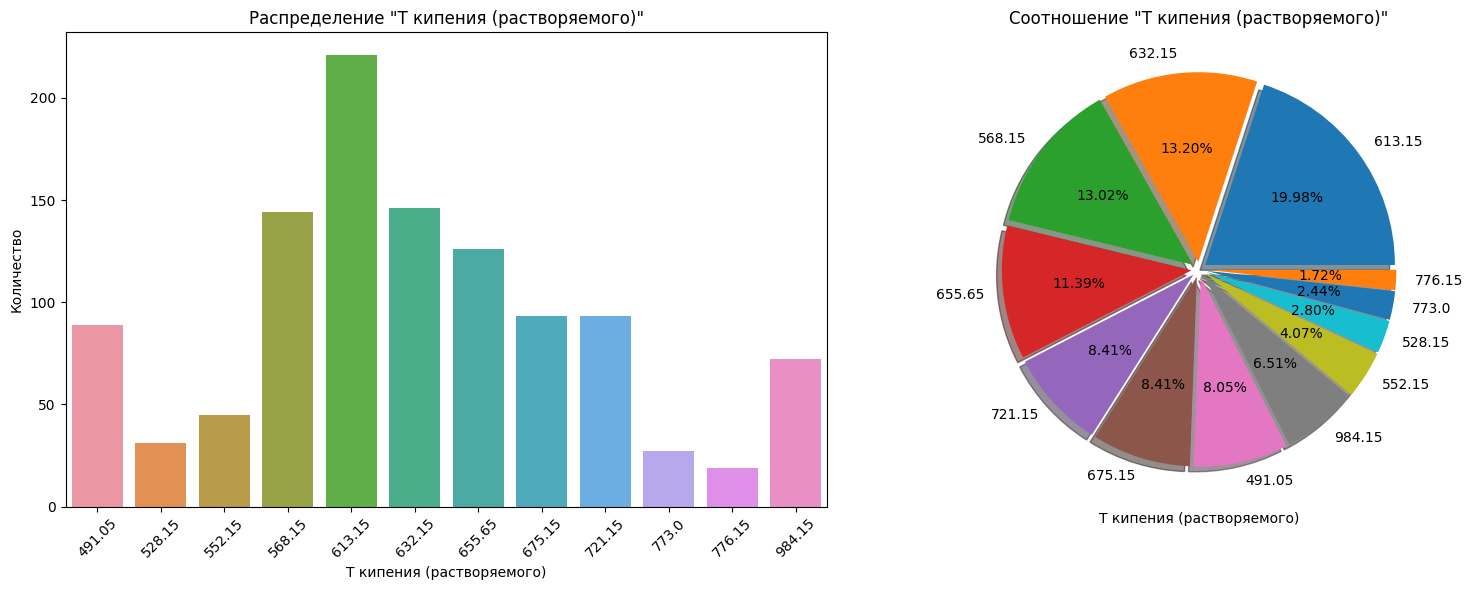

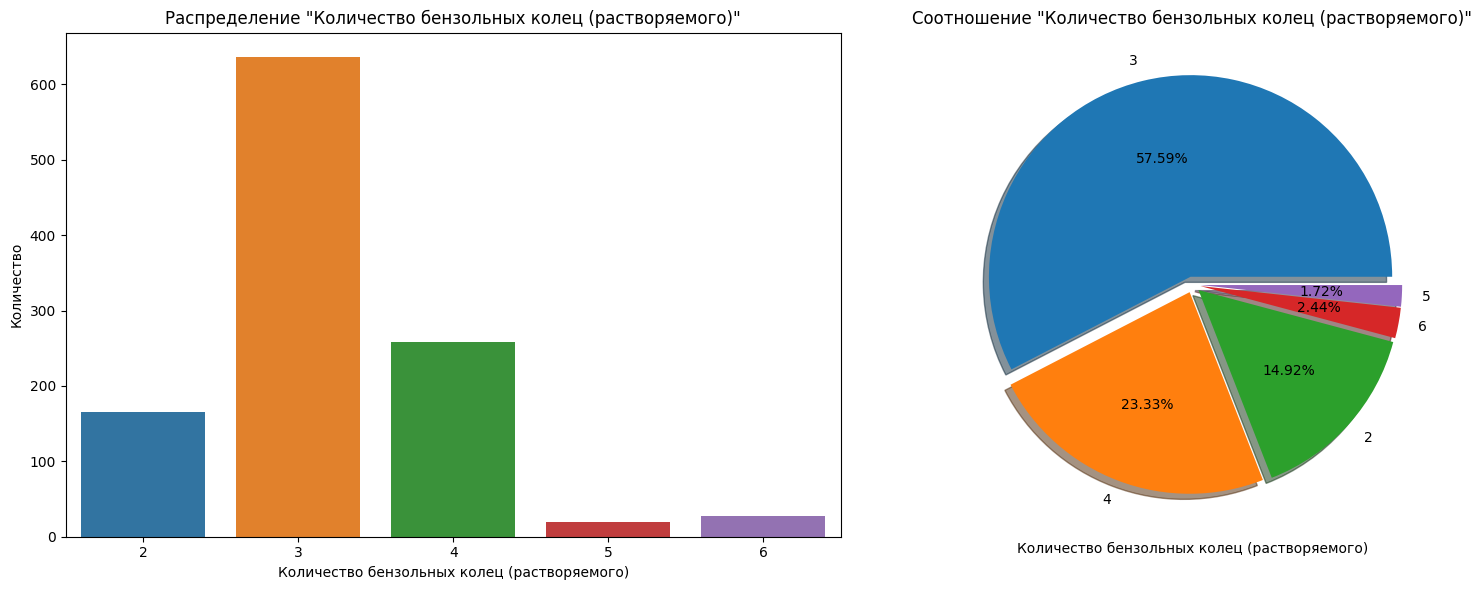

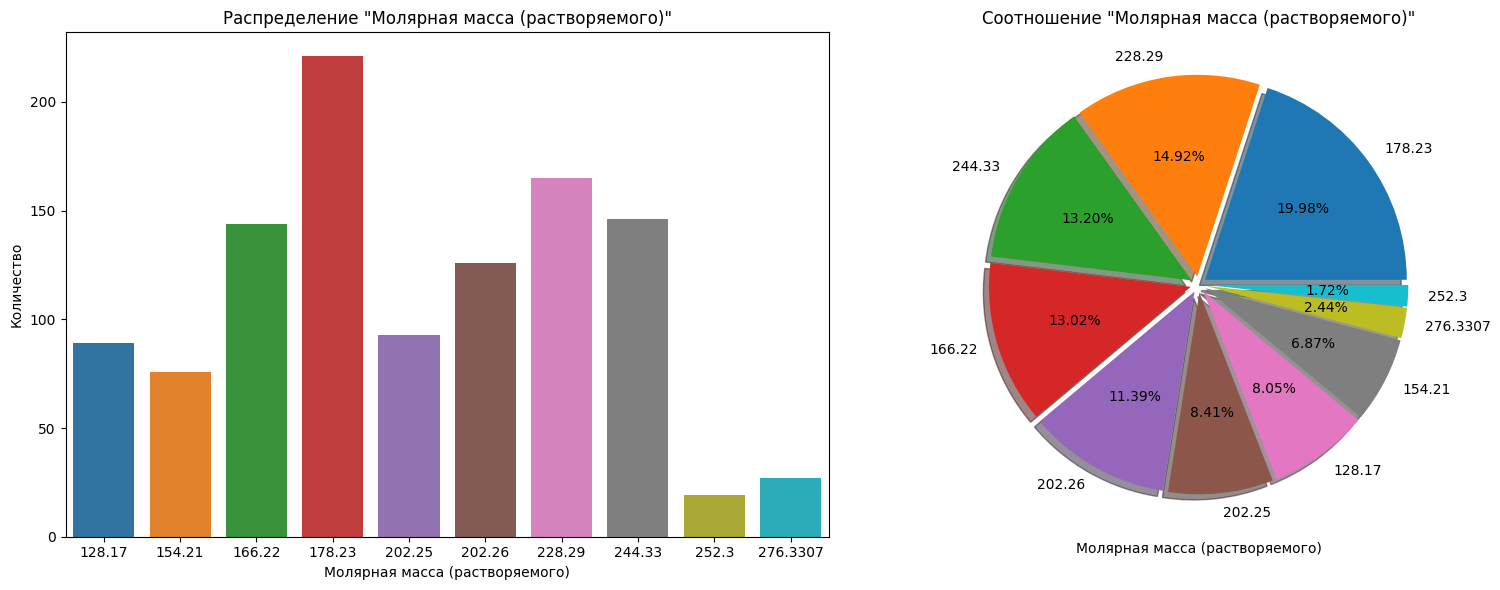

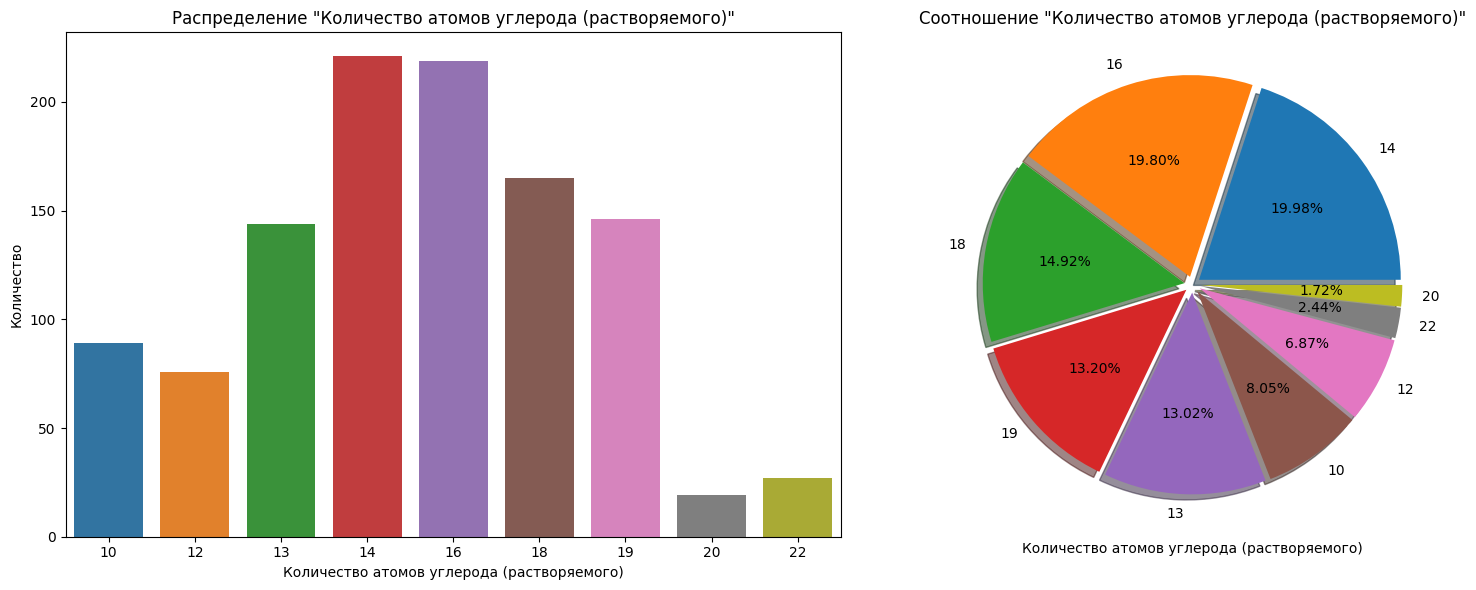

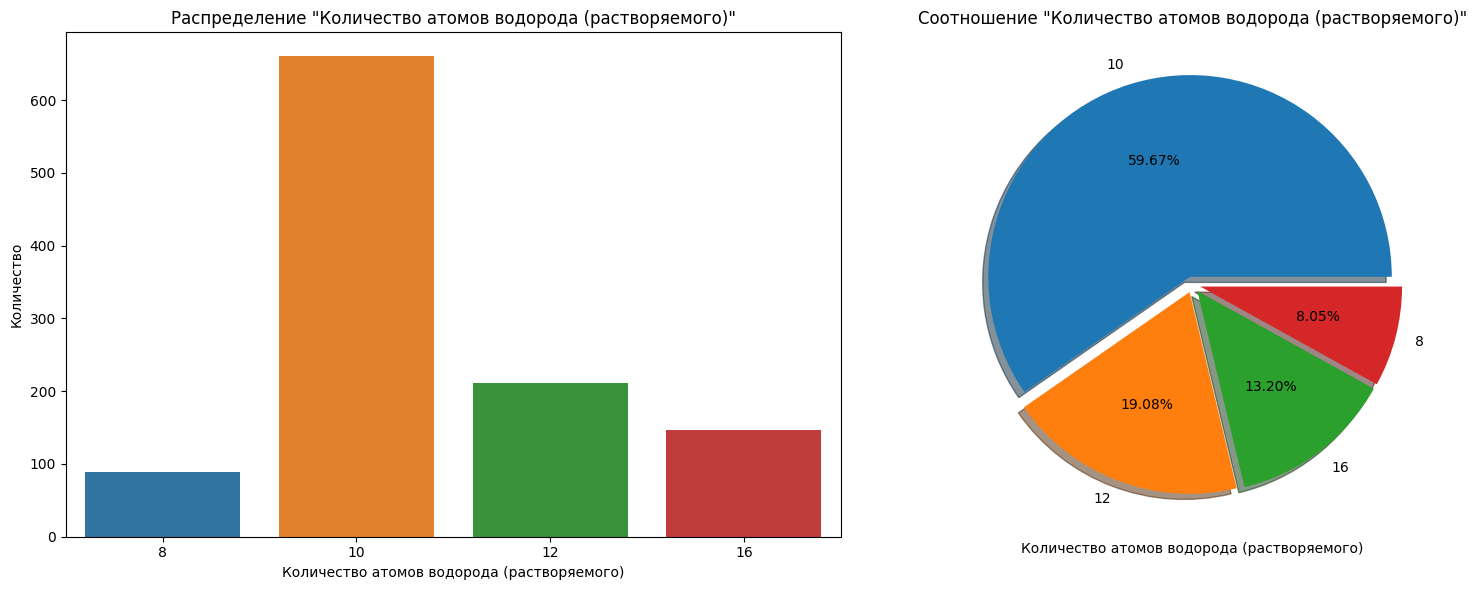

C:\Users\Aleksandr\anaconda3\envs\practicum\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


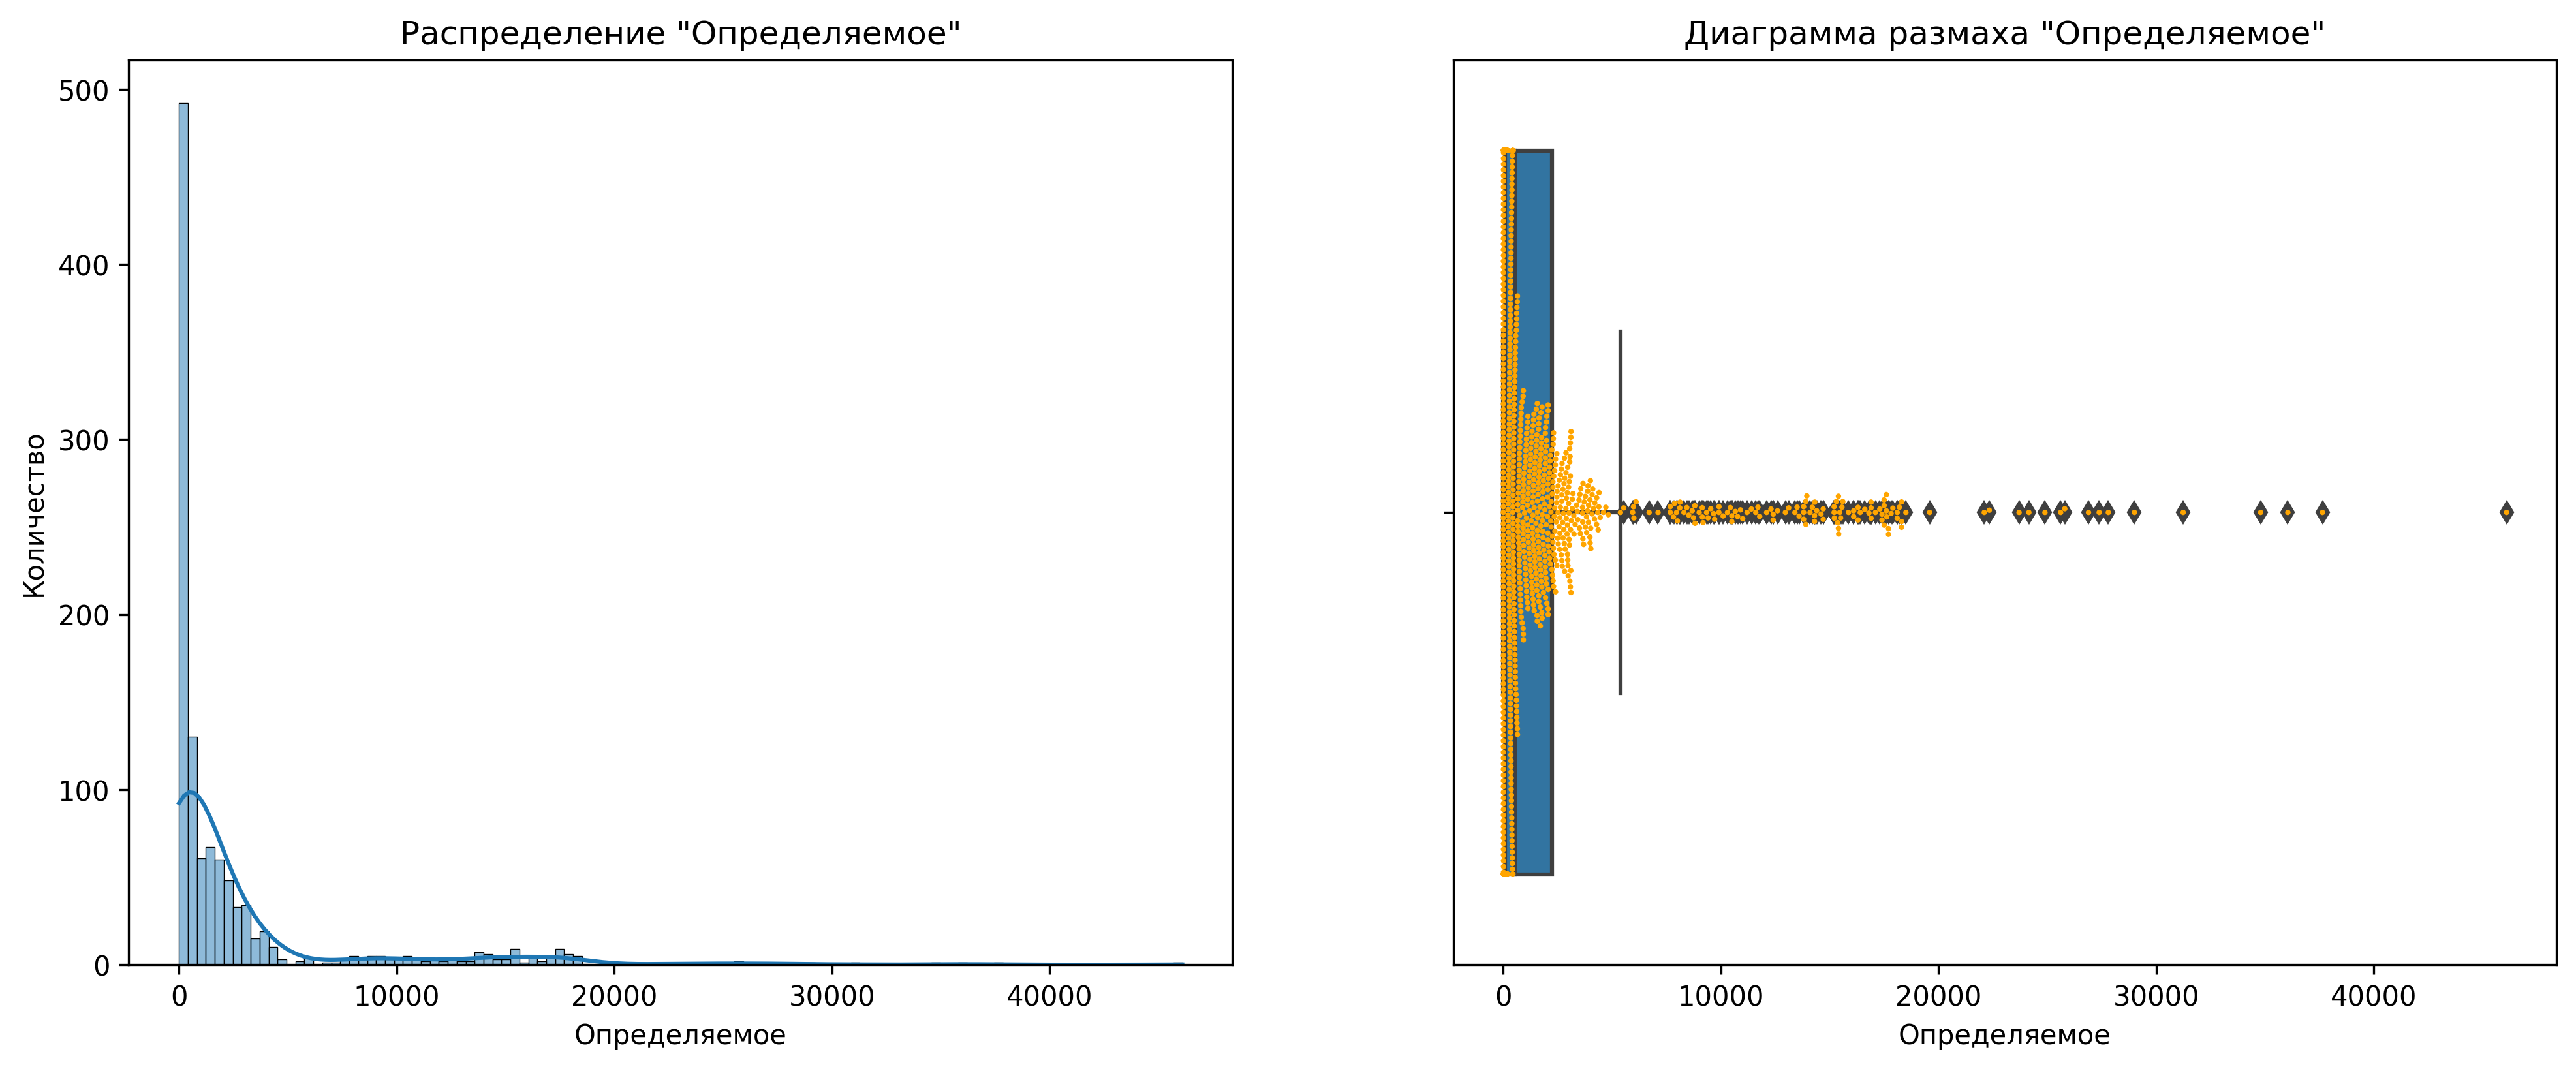

In [14]:
for column in solubility.columns:
    if column in cat_cols.keys():
        draw_categorical_plots(solubility, column, cat_cols[column])
    if column in num_cols.keys():
        draw_numeric_plots(solubility, column, num_cols[column])

<Figure size 4800x4800 with 0 Axes>

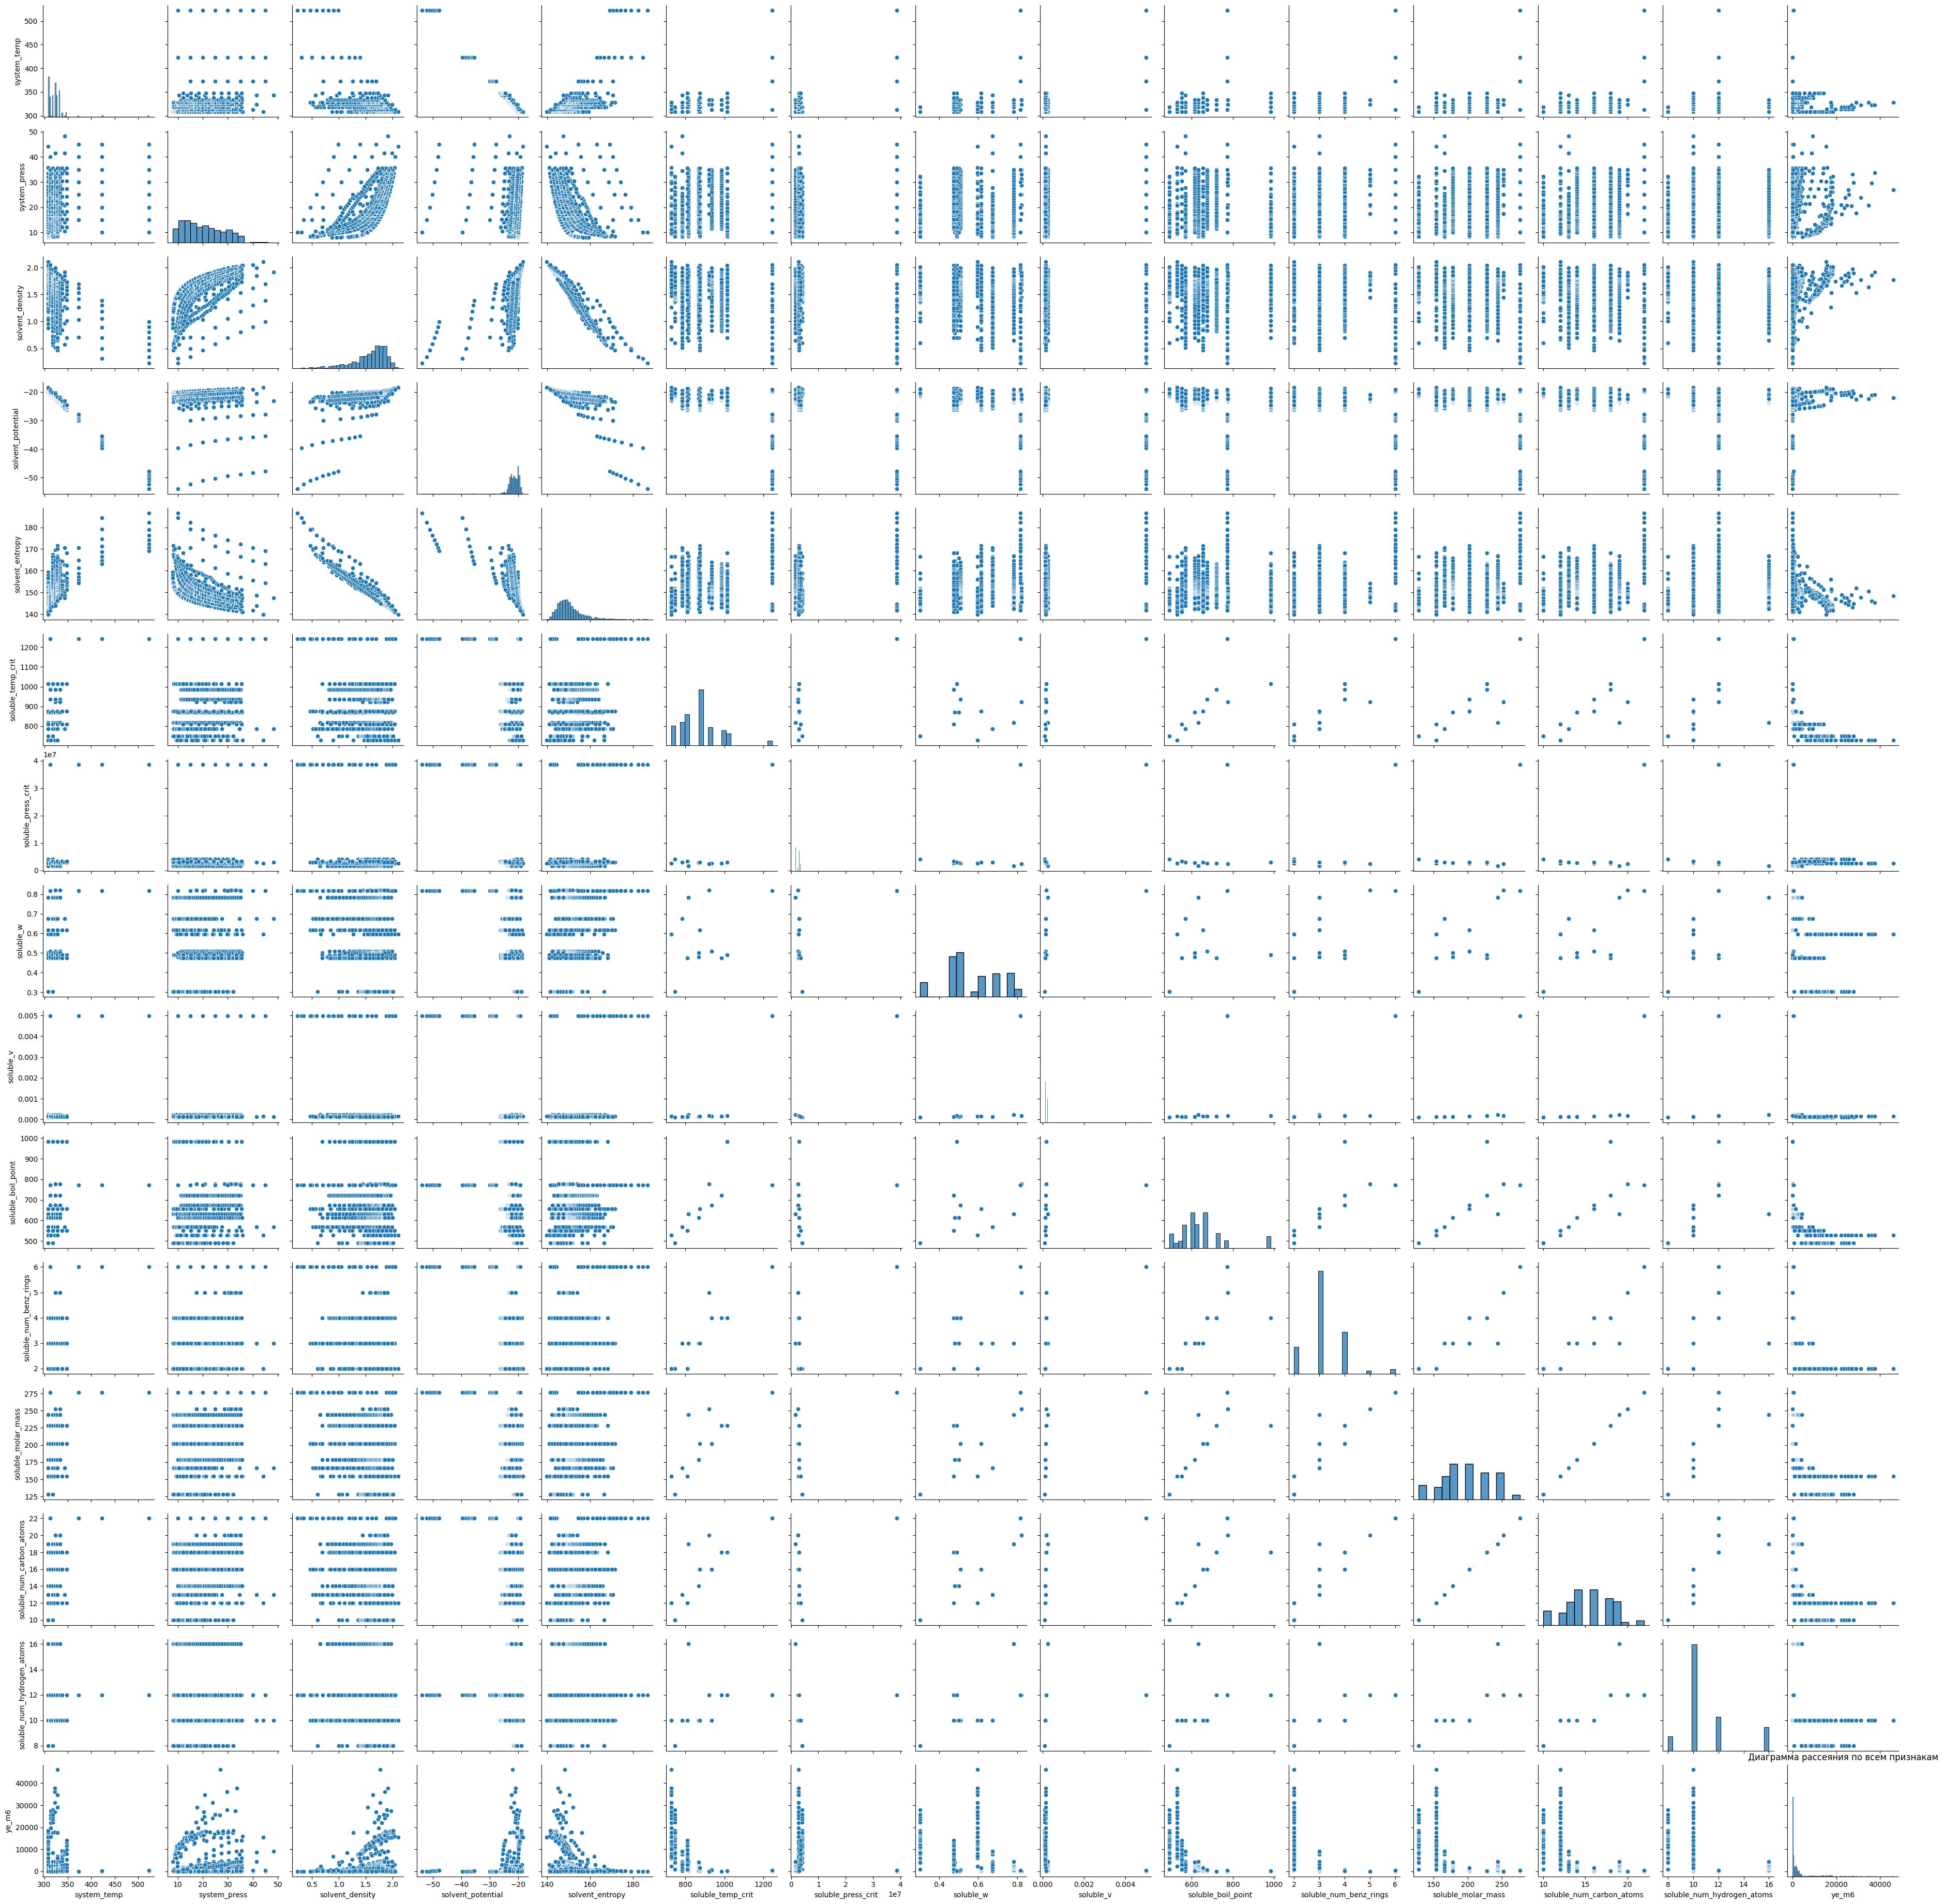

In [15]:
plt.figure(figsize=(16, 16), dpi=300)
sns.pairplot(solubility);
plt.title('Диаграмма рассеяния по всем признакам')
plt.show()

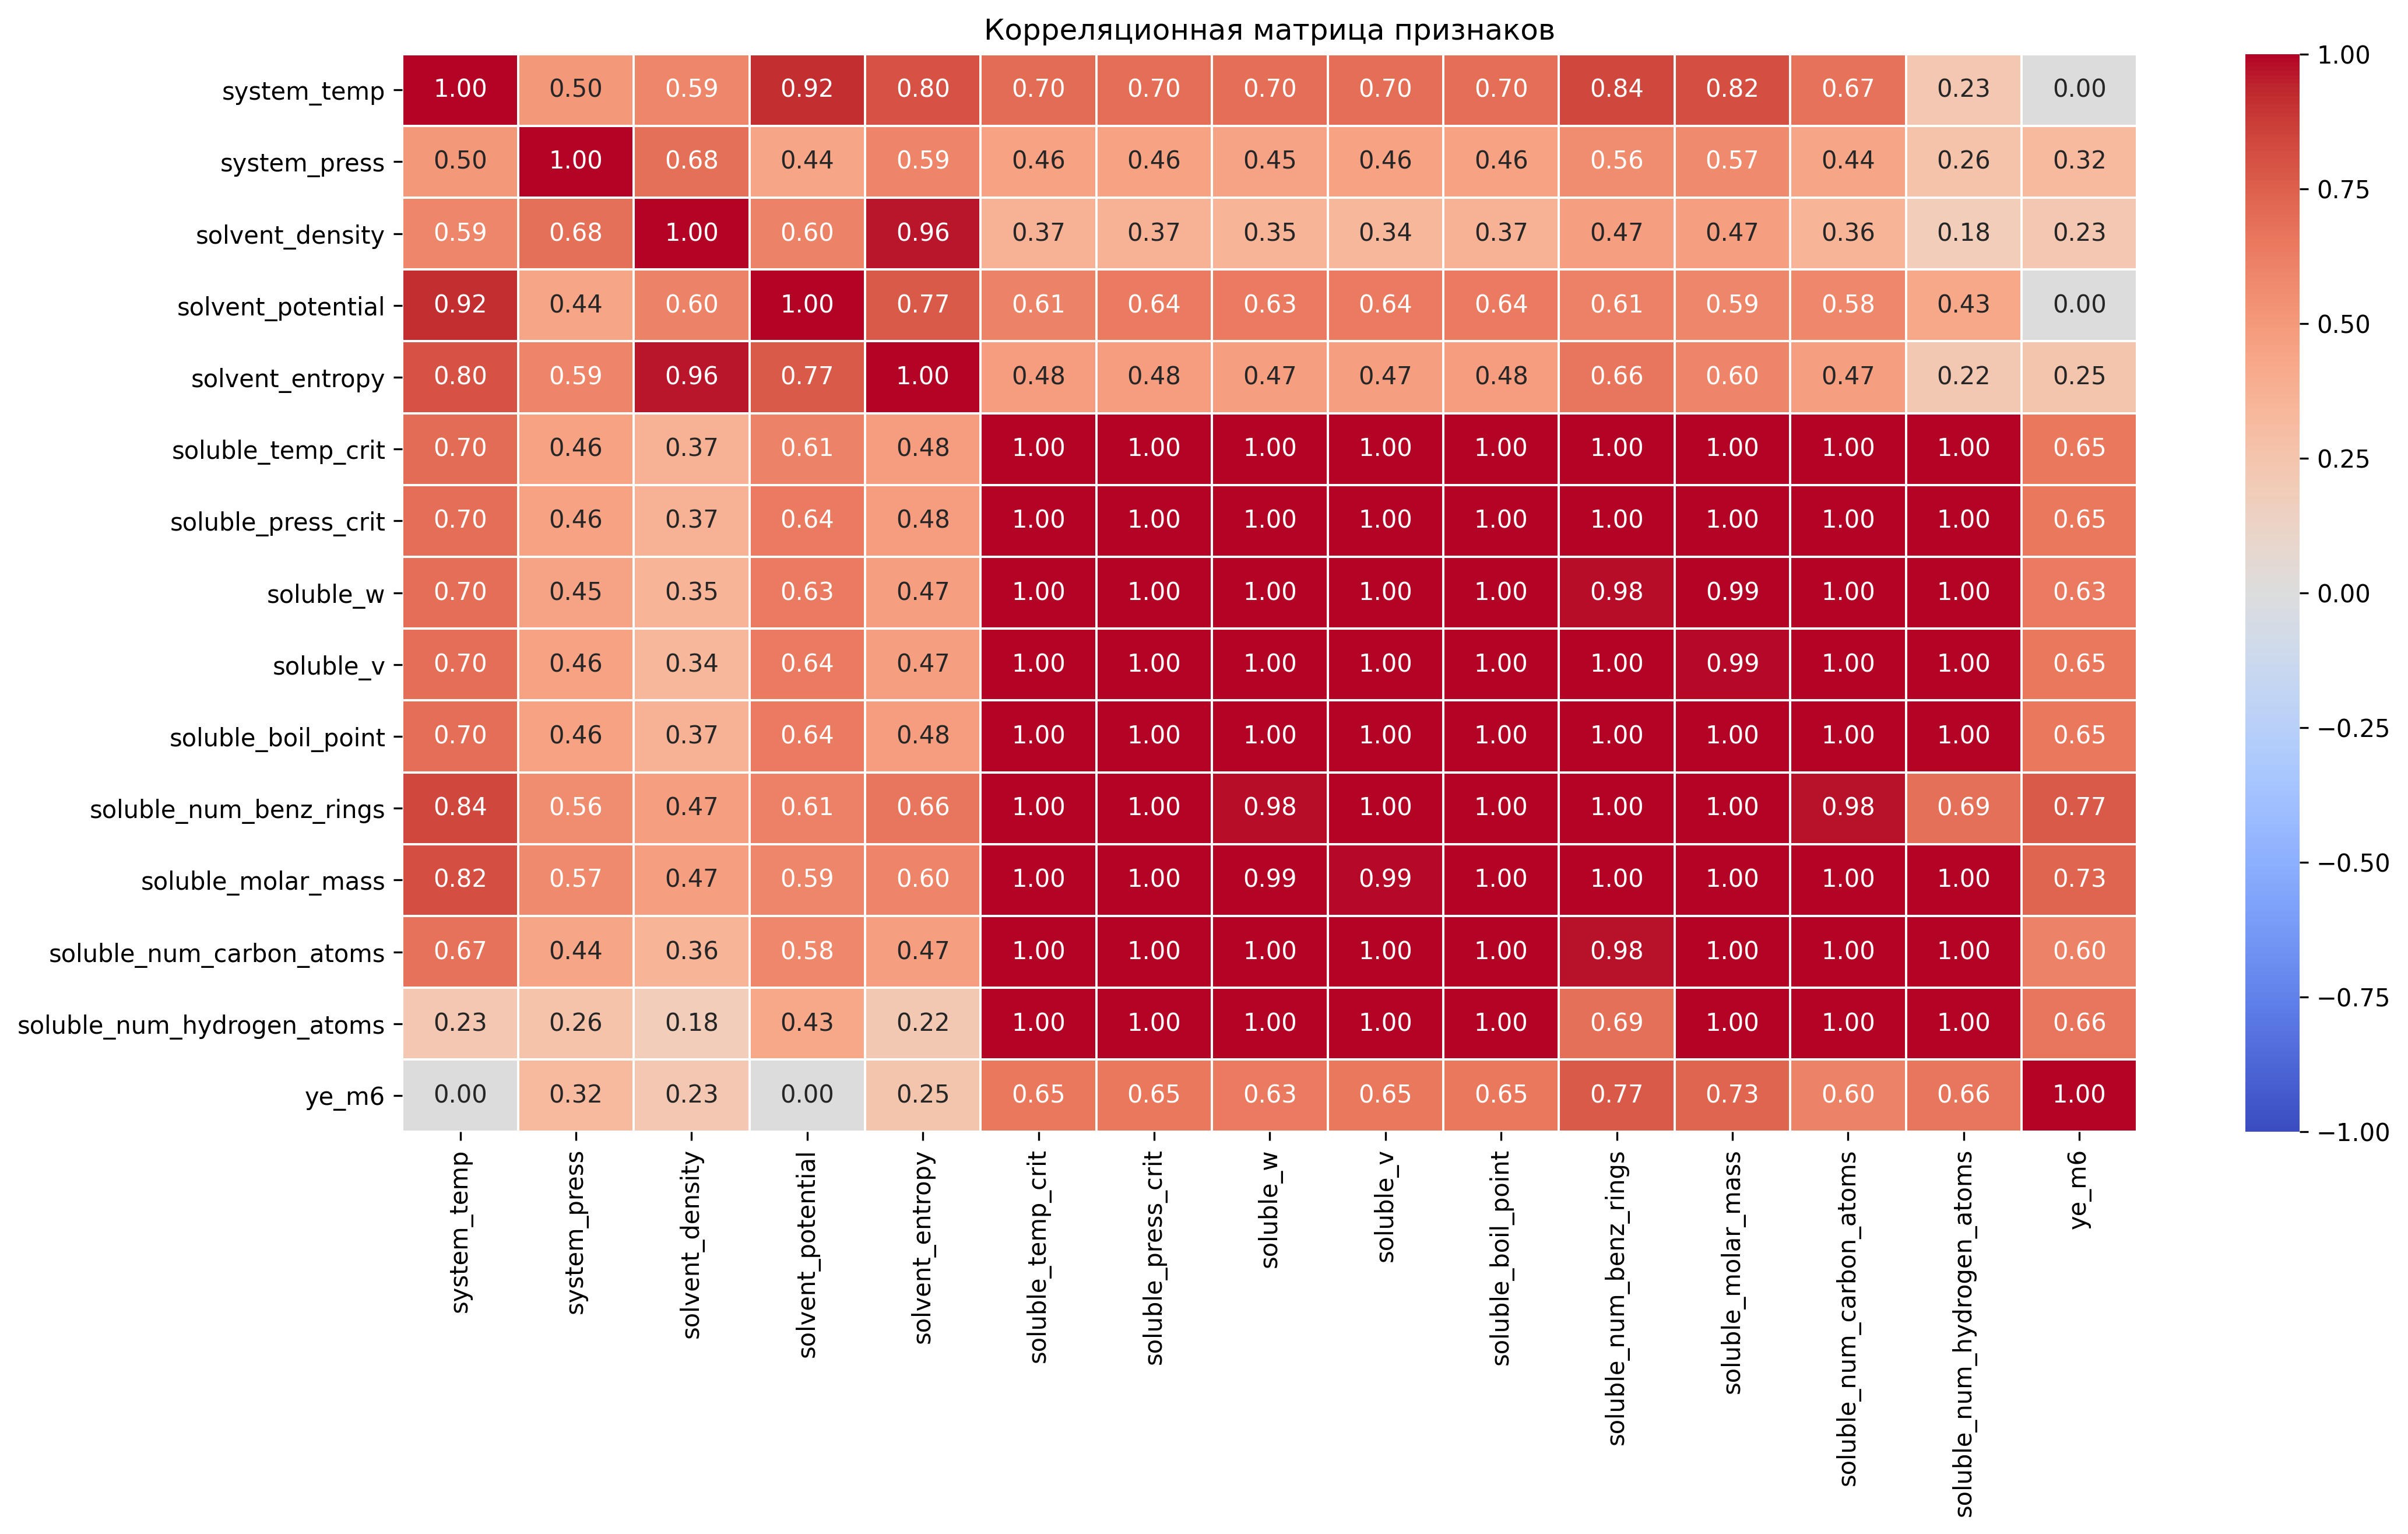

In [16]:
pkcmx = solubility.phik_matrix(interval_cols=num_cols)

plt.figure(figsize=(16, 8), dpi=300)
sns.heatmap(pkcmx, annot=True, fmt='.2f', vmin=-1, vmax=1, linewidth=.5, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

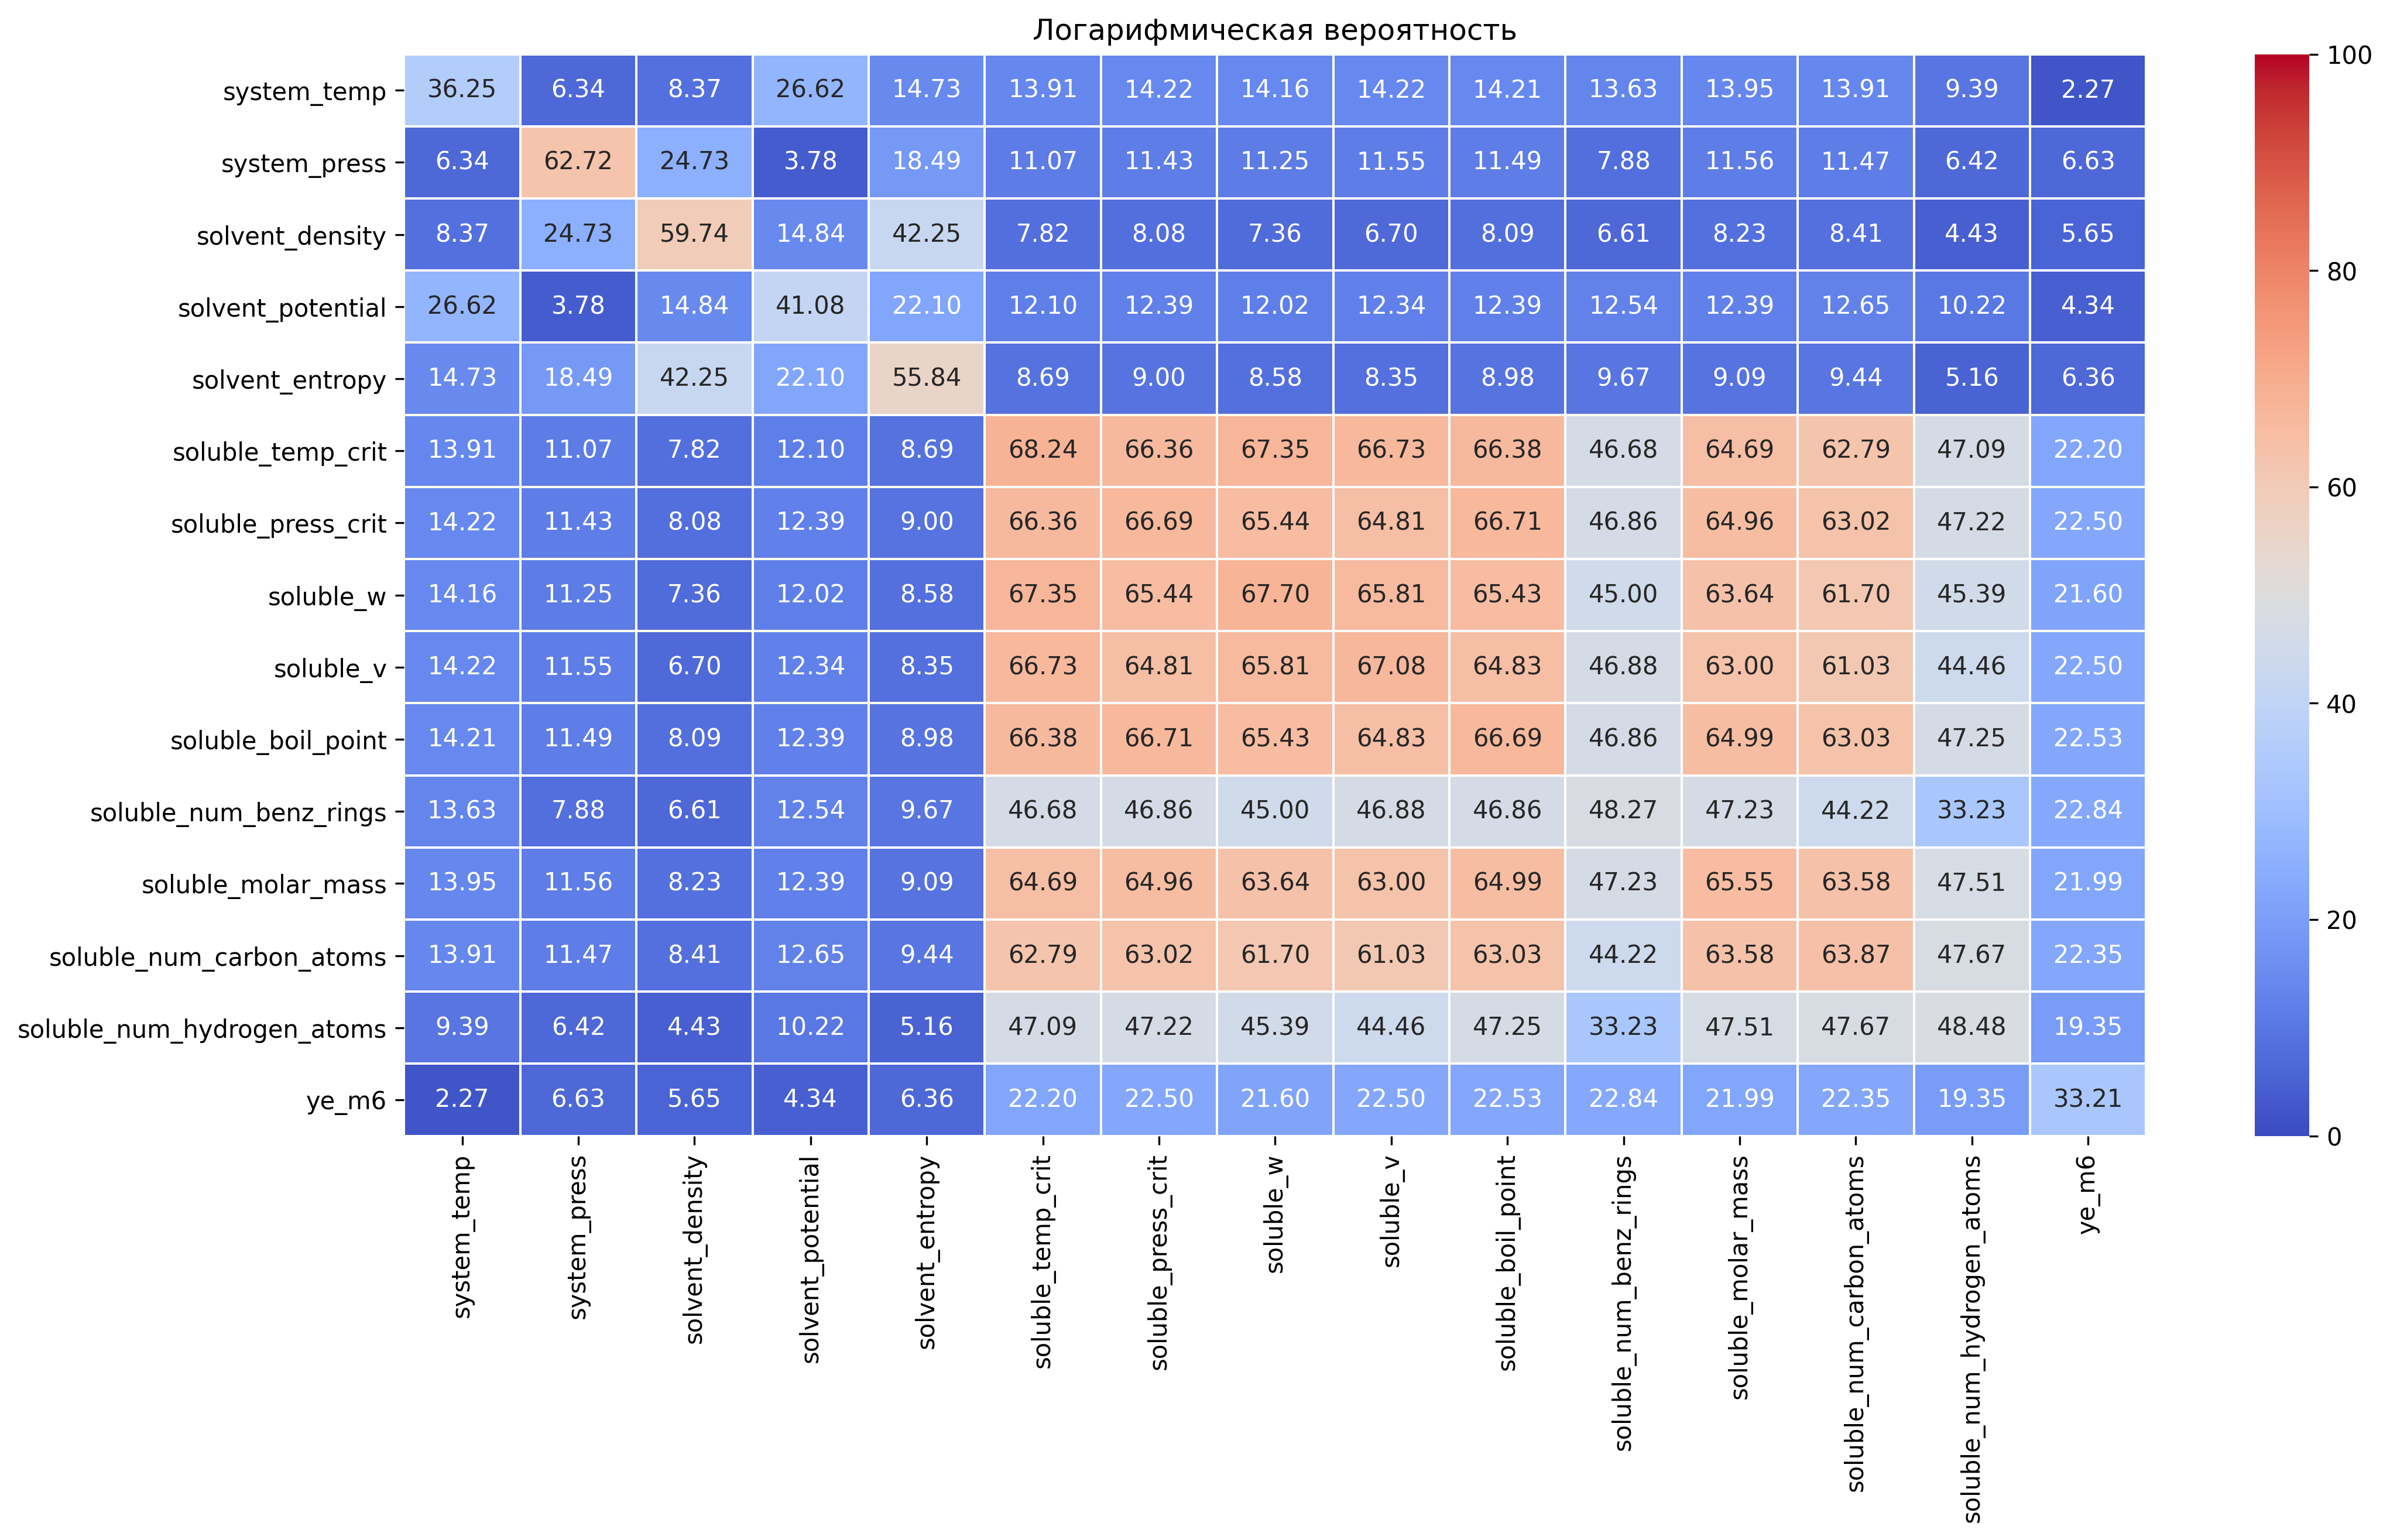

In [17]:
sgmx = solubility.significance_matrix(interval_cols=num_cols)

plt.figure(figsize=(16, 8), dpi=300)
sns.heatmap(sgmx, annot=True, fmt='.2f', vmin=0, vmax=100, linewidth=.5, cmap='coolwarm')
plt.title('Логарифмическая вероятность')
plt.show()

**Вывод по исследовательскому анализу данных.**

- Все признаки растворяемого являются числовыми, но относятся скорее к дискретным переменным, т.к. имеют ограниченный диапазон конкретных значений. Можно попробовать модели с разным подходом - передавать такие признаки как числовые или категориальные (номинальные или порядковые), либо синтезировать из них новые признаки (тема для будущих исследований).
- По графикам в количественных признаках (таких как приведенная плотность, химический потенциал и энтропия растворителя) заметно довольно большое число аномальных значений - удалить их из исходных данных мы можем, но данные (вероятно) получены из натурных экспериментов и точно отражают характеристики возможных реальных объектов, поэтому удаление таких аномальных значений может привести к переобучению модели на наиболее усредненных значениях.
- У целевого признака также довольно большой разброс значений и множество аномалий. Их также лучше удалить для повышения точности модели. Возможным решением является создание отдельных моделей для аномальных значений (тема для будущих исследований).
- Распределение признаков сложно классифицировать (нормальным не является, есть выбросы).
- По диаграмме рассеяния заметна некоторая зависимость между данными (возможно, она будет устранена после отбора признаков, или нужно сделать полиномизацию - необходимо проверять).
- По корреляции признаков:
    - Все признаки растворяемого являются мультиколлинеарными. Это может быть существенной проблемой для линейных моделей, от мультиколлинеарности лучше избавиться путем отбора признаков (тема для будущих исследований).
    - Целевой признак также больше коррелирует с признаками растворяемого, чем с системными или растворителя.

## Построение моделей машинного обучения

Построим пайплайны для подбора оптимальной модели МО.

In [18]:
ohe_columns = [
]

ord_columns = [
]

num_columns = [
    'system_temp',
    'system_press',
    'solvent_density',
    'solvent_potential',
    'solvent_entropy',
    'soluble_temp_crit',
    'soluble_press_crit',
    'soluble_w',
    'soluble_v',
    'soluble_boil_point',
    'soluble_num_benz_rings',
    'soluble_molar_mass',
    'soluble_num_carbon_atoms',
    'soluble_num_hydrogen_atoms'
]

In [19]:
ohe_pipe = Pipeline(
    [('imputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

ord_pipe = Pipeline(
    [('imputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('imputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Как уже указывали выше, от выбросов нужно избавляться для улучшения предиктивных показателей модели. Удалим наиболее аномальние значения.

In [20]:
solubility_cleaned = solubility.query('ye_m6 <= 5000 and solvent_potential > -30 and solvent_entropy < 165')

In [21]:
((solubility.shape[0] - solubility_cleaned.shape[0]) * 100) / solubility.shape[0]

15.280289330922242

Удалено примерно 15.3% аномальных значений из исходной выборки. Это довольно большой показатель, его желательно уменьшить до ~10%.

Размер тестовой выборки - 20% - т.е. модель обучается на 80% данные и верифицируется на 20% данных.

In [22]:
RANDOM_STATE = 42
TEST_SIZE = 0.20

X_train, X_test, y_train, y_test = train_test_split(
    solubility_cleaned.drop('ye_m6', axis=1),
    solubility_cleaned['ye_m6'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE
)

In [23]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

param_grid = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },

    {
        'models': [Lasso(random_state=RANDOM_STATE)],
        'models__alpha': np.linspace(0.1, 2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },

    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha': np.linspace(0.1, 2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },
    
    {
        'models': [ElasticNet(random_state=RANDOM_STATE)],
        'models__alpha': np.linspace(0.1, 2, 15),
        'models__l1_ratio': np.linspace(0, 1, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },

    {
        'models': [SVR(
            kernel='poly'
        )],
        'models__C': [0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 5],
        'models__degree': range(2, 10),
        'models__epsilon': np.linspace(0.1, 1.5, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },
    
    {
        'models': [KNeighborsRegressor()],
        'models__n_neighbors': range(2, 200),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]   
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 100),
        'models__min_samples_split': range(2, 100),
        'models__min_samples_leaf': range(2, 100),
        'models__max_features': [None, 'sqrt', 'log2'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },

    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300, 400, 500],
        'models__max_depth': range(5, 20),
        'models__min_samples_split': range(2, 10),
        'models__min_samples_leaf': range(1, 10),
        'models__max_features': [None, 'sqrt', 'log2'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    },

    {
        'models': [GradientBoostingRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 500],
        'models__learning_rate': [0.01, 0.1, 0.2],
        'models__max_depth': range(3, 10),
        'models__subsample': [0.7, 0.8, 0.9, 1.0],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    }
]

In [24]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=1000
)
randomized_search.fit(X_train, y_train)

print(f'Лучшая модель и её параметры:\n{randomized_search.best_estimator_}')
print(f'Метрика лучшей модели на тренировочной выборке при кросс-валидации: {randomized_search.best_score_}')

Лучшая модель и её параметры:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  []),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer_before_ord',
                                                      

С помощью случайного поиска оптимальных моделей и гиперпараметров для этих моделей наиболее точной моделью оказалась `RandomForestRegressor` с гиперпараметрами `max_depth=16, max_features='sqrt', min_samples_leaf=3, min_samples_split=4, n_estimators=200`.

Усредненная метрика RMSE лучшей модели на тренировочной выборке при кросс-валидации: 240.22

Ниже представлены значения метрик для тестовых данных.

In [25]:
pred = randomized_search.best_estimator_.predict(X_test)

print(f'RMSE = {mean_squared_error(y_test, pred, squared=False):.5f}')
print(f'MAE = {mean_absolute_error(y_test, pred):.5f}')
print(f'R2 = {r2_score(y_test, pred):.5f}')

RMSE = 236.56308
MAE = 106.83315
R2 = 0.95496


На тестовых данных средняя абсолютная ошибка (MAE) равна 106.8, коэффициент детерминации $R^2$ показывает хорошее значение в 95.5%, RMSE - 236.56

In [26]:
pred_df = pd.concat([y_test, pd.Series(pred, index=y_test.index)], axis=1)
pred_df.columns = ['ye_m6_true', 'ye_m6_pred']
pred_df['residuals'] = pred_df['ye_m6_true'] - pred_df['ye_m6_pred']
pred_df

ye_m6_true   ye_m6_pred   residuals
427     1370.00  1312.524401   57.475599
119     1230.00  1346.930973 -116.930973
303       89.80    67.700693   22.099307
784     1260.00  1326.820509  -66.820509
815     3050.00  2842.938827  207.061173
..          ...          ...         ...
980        9.89     9.185607    0.704393
2        241.00   287.464389  -46.464389
569      140.00   141.251045   -1.251045
437     1910.00  1896.845671   13.154329
521      260.00   363.770768 -103.770768

[188 rows x 3 columns]

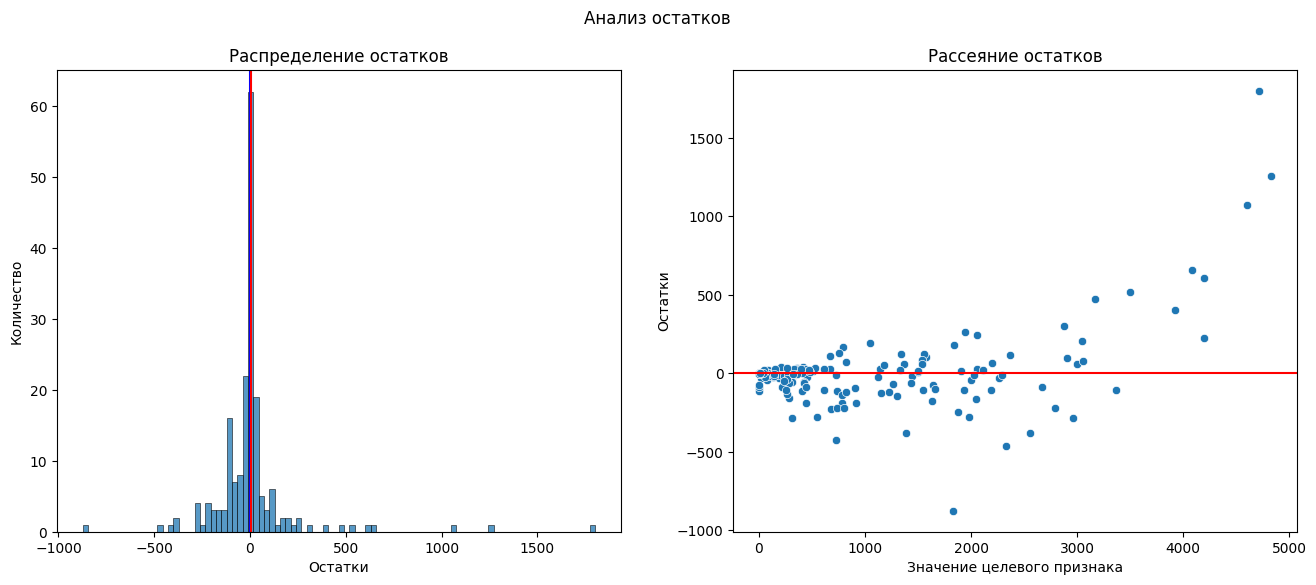

In [27]:
fig = plt.figure(figsize=(16, 6))
fig.suptitle(f'Анализ остатков')

ax1 = plt.subplot(121)
ax1 = sns.histplot(data=pred_df, x='residuals')
ax1.axvline(0, color='b')
ax1.axvline(pred_df['residuals'].mean(), color='r')
ax1.set_title('Распределение остатков')
ax1.set_xlabel('Остатки')
ax1.set_ylabel('Количество')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(data=pred_df, x='ye_m6_true', y='residuals')
ax2.axhline(0, color='r')
ax2.set_title('Рассеяние остатков')
ax2.set_xlabel('Значение целевого признака')
ax2.set_ylabel('Остатки')

plt.show()

**Выводпо моделям машинного обучения.**

- Протестированы следующие модели:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `ElasticNet`
    - `SVR`
    - `KNeighborsRegressor`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`
    - `GradientBoostingRegressor`
- Лучшая модель по итогам тестов - `RandomForestRegressor` с гиперпараметрами
    - `max_depth=16`
    - `max_features='sqrt'`
    - `min_samples_leaf=3`
    - `min_samples_split=4`
    - `n_estimators=200`
- Значения метрик оптимальной модели `RandomForestRegressor` на тестовой выборке:
    - RMSE = 236.56308
    - MAE = 106.83315
    - R2 = 0.95496
- Анализ остатков модели на графике показывает зависимость, похожую на квадратическую (форма напоминает параболу) - значения ошибки увеличиваются со значением целевого признака. Это говорит о том, что модель МО скорее всего уловила не все зависимости в исходных данных. Это не удивительно в данном случае, потому что рассматривался очень ограниченный набор гиперпараметров, а также очень ограниченный диапазон значений для них.
- В дальнейшем можно будет использовать расширенный диапазон гиперпараметров и их значений, а также использовать вероятностный (байесовский) подход к подбору гиперпараметров, что может существенно увеличить точность модели, а также попробовать использовать модели градиентного бустинга вместо случайного леса.
- Также для увеличения точности модели можно попробовать применить полиномизацию признаков.

## Анализ важности признаков

Оценим важность признаков с помощью встроенных в модель инструментов.

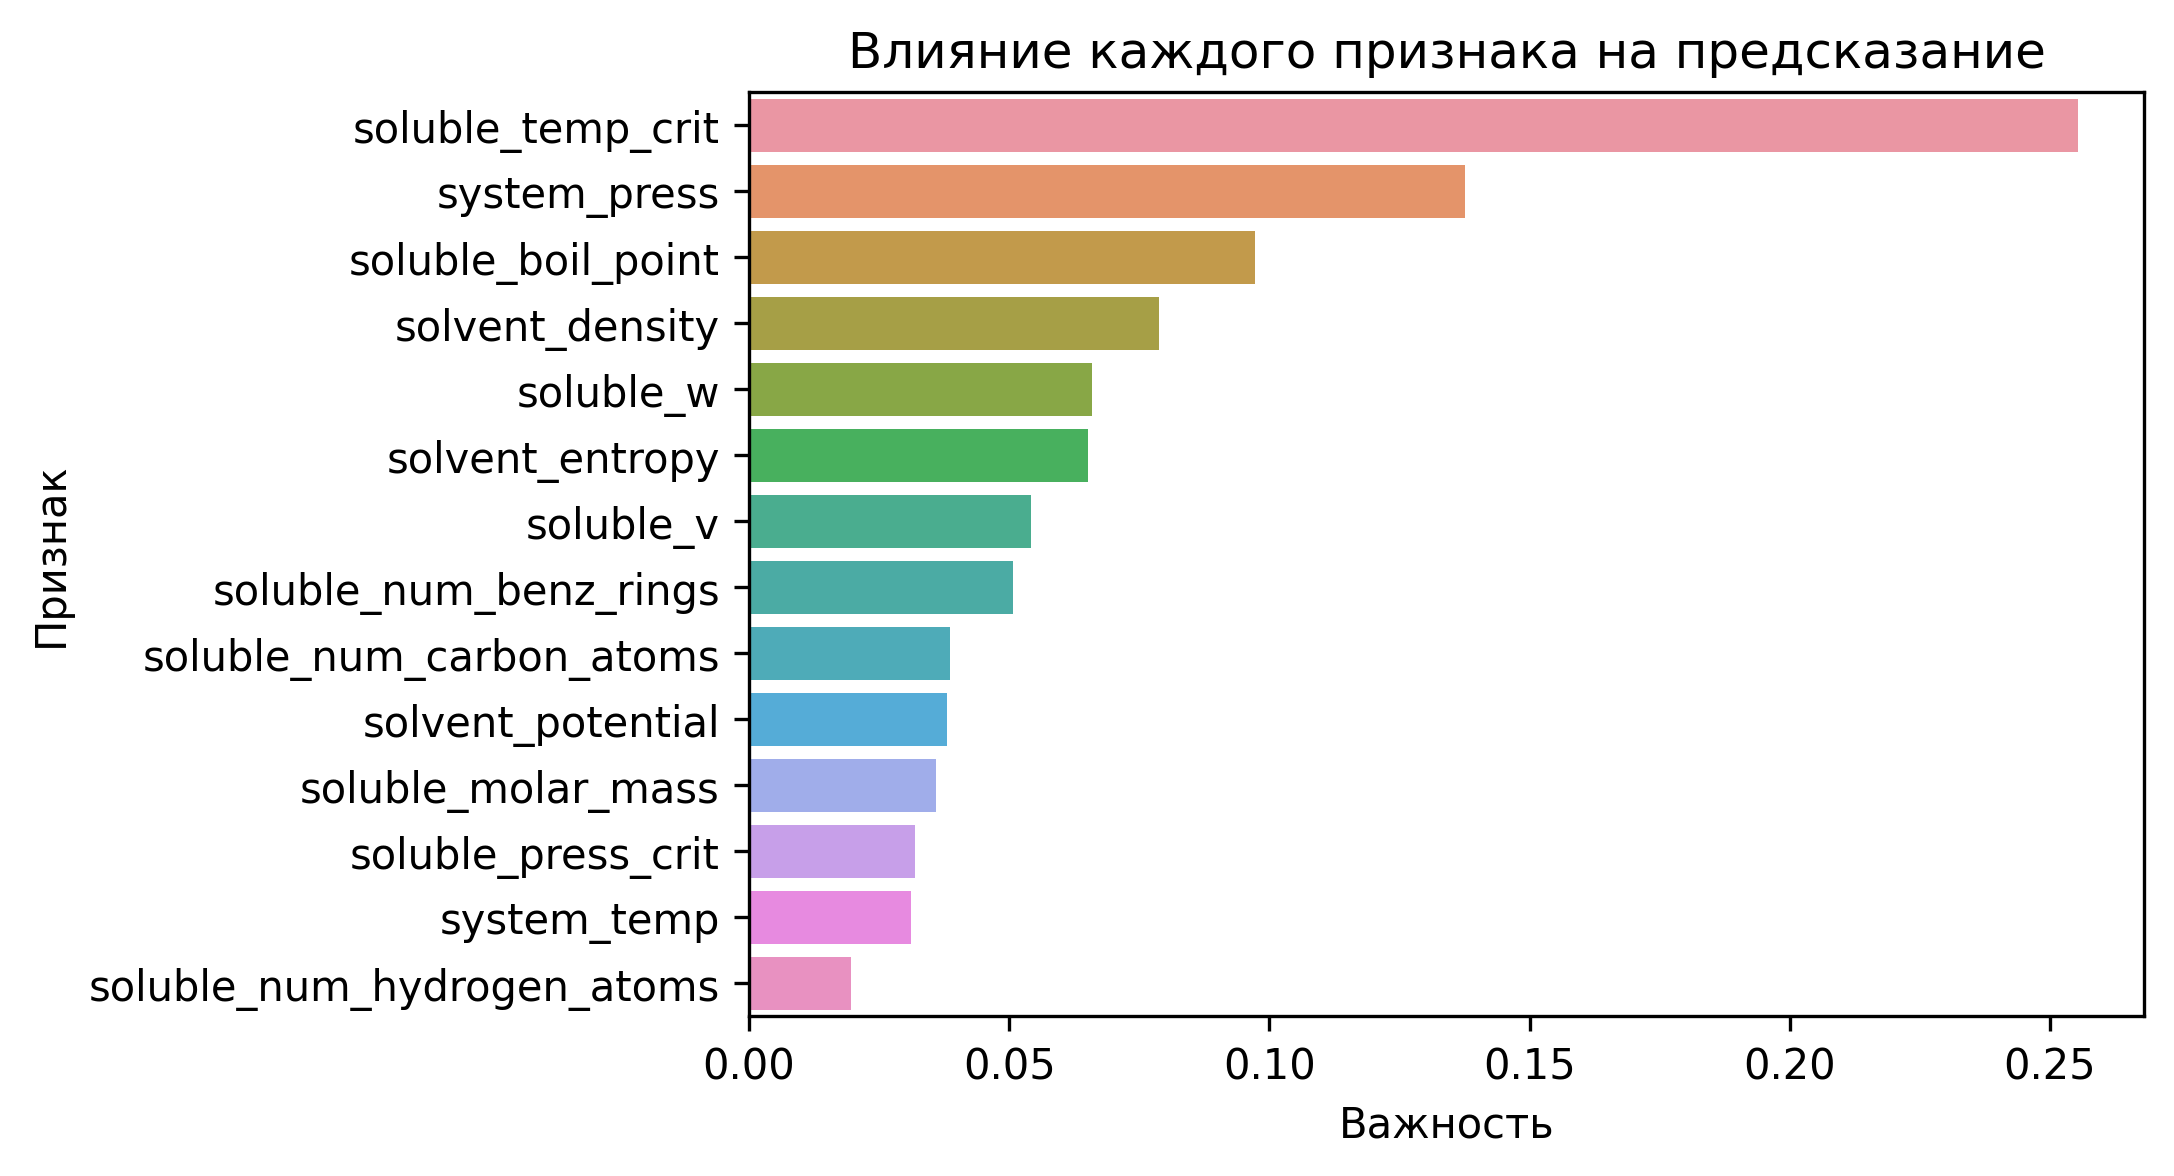

In [28]:
feature_importance = pd.DataFrame(
    {
        'Признак': randomized_search.best_estimator_.feature_names_in_,
        'Важность': randomized_search.best_estimator_['models'].feature_importances_,
    }
)
feature_importance = feature_importance.sort_values('Важность', ascending=False)

plt.figure(figsize=(6, 4), dpi=300)
sns.barplot(data=feature_importance, x='Важность', y='Признак')
plt.title('Влияние каждого признака на предсказание')
plt.show()

К наиболее важным признакам можно отнести:

- `soluble_temp_crit`
- `system_press`
- `soluble_boil_point`

В дальнейшем можно будет более подробно отоброть признаки, например с помощью значения Шепли (SHAP-values).